# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# mount the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

Let's start by having an overall understanding of what our data looks like and loading our dataset.



In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/PGP-DS_UT/3-Supervised Foundations/Project_3/used_device_data.csv')
# returns the first 5 rows
df = df_original.copy()
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
df.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

## Data Overview

In [ ]:
#the structure of our dataset
df.shape

(3454, 15)

We have 3,454 different phones for which we have 15 different columns that describe them

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

We can see just from the info table that we have some null values that we might need to deal with. for now, I'll leave it as is


In [ ]:
#let's see which features have missing values and how many they have
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#percentage amount of missing values per feature
df.isna().sum() / len(df)

brand_name               0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
main_camera_mp           0.051824
selfie_camera_mp         0.000579
int_memory               0.001158
ram                      0.001158
battery                  0.001737
weight                   0.002027
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64

There are several missing values, primarily in the `main_camera_mp` feature. All in all, it's not a substantial amount of missing values. For `main_camera_mp`, this accounts for about 5% of missing data. The rest are not as significant but will be dealt with.


In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

In [ ]:
df.describe(include = 'all').T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3275.0    NaN      NaN   NaN     9.460208     4.815461   
selfie_camera_mp       3452.0    NaN      NaN   NaN     6.554229     6.970372   
int_memory             3450.0    NaN      NaN   NaN    54.573099    84.972371   
ram                    3450.0    NaN      NaN   NaN     4.036122     1.365105   
battery                3448.0    NaN      NaN   NaN  3133.402697  1299.682844   
weight                 3447.0    NaN      NaN   NaN   182.751871    88.413228   
release_year           3454.0    NaN      NaN   NaN  2015.965258     2.298455   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size                5.08      12.7     12.83     15.34     30.71  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
release_year             2013.0    2014.0    2015.5    2018.0    2020.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841

**Observations:**


*   We have some missing values that we will need to impute, mostly for `main_camera_mp`, which represents the highest amount of missing values in the dataset
*   There are several categorical variables (`brand_name`, `os`, `4g`, and `5g`), which we will need to convert to dummy variables for further analysis
* Camera megapixel (for both `main_camera_mp` and `selfie_camera_mp`) have a high variance in terms of megapixel amount.

* The weight of the phone varies from 69 grams all the way to 855 grams.



## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis

###Categorical Features

I will first work with understanding the distribution of categorical features, which include:


*   `brand_name`
*   `os`
*   `4g`
*   `5g`  




I will use a function to create barplots to better visualize our categorical features as follows:

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature,title_name, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=45, fontsize=15)
    plt.title(title_name)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

#### Brand Name

In [ ]:
#number of phones by brands
brand_name_counts = df.groupby('brand_name')['brand_name'].count().sort_values(ascending = False)
print(brand_name_counts)

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
Name: brand_name, dtype: int64


In [ ]:
df.groupby('brand_name')['brand_name'].nunique().sum()

34

There are 33 different brands of phones, plus the Other's category (34 total in the sample)

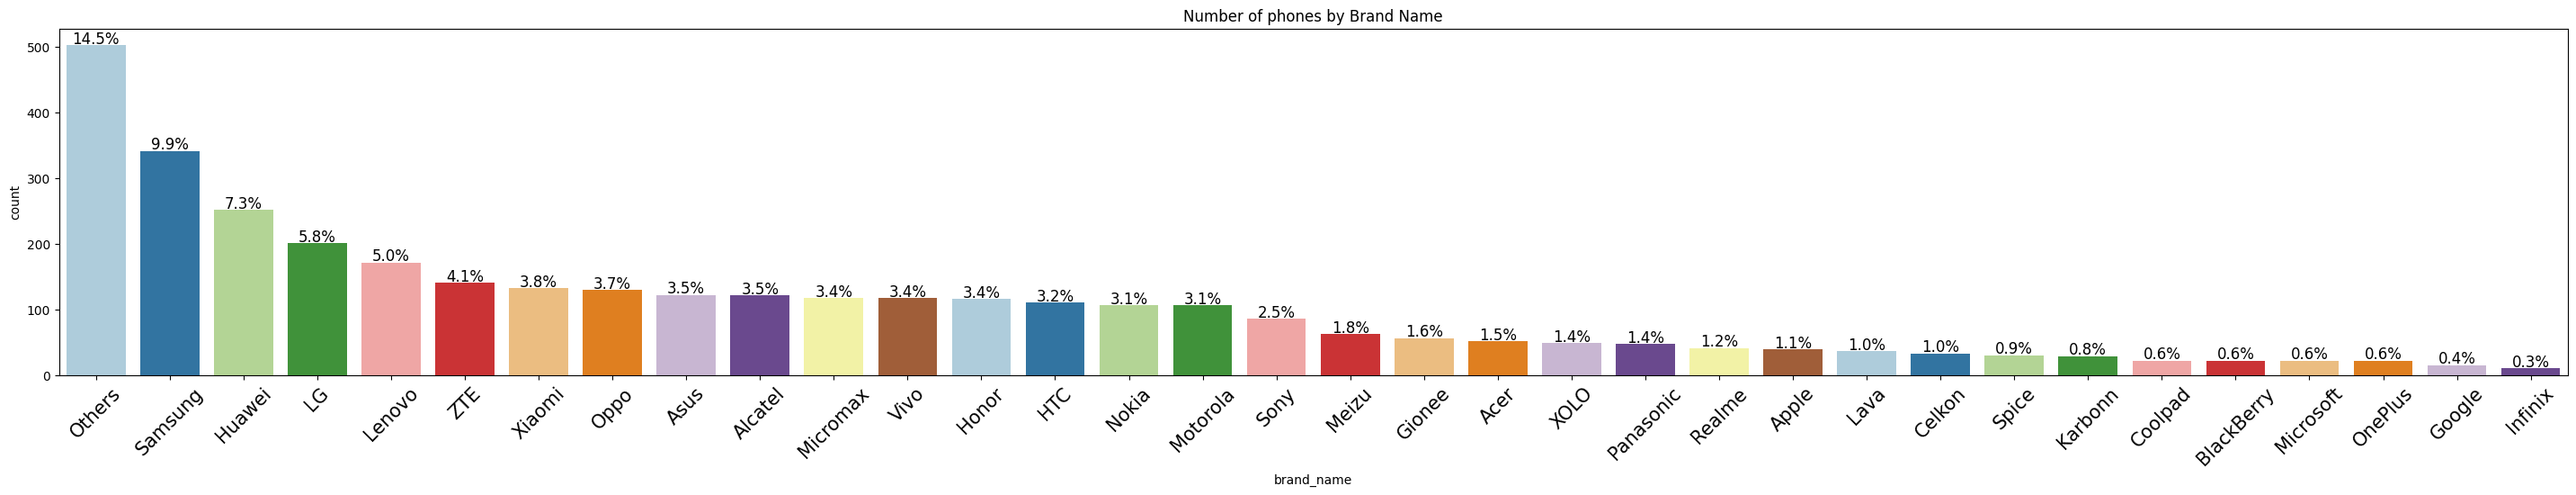

In [ ]:
labeled_barplot(df, "brand_name", perc=True, title_name = 'Number of phones by Brand Name')

#### Operating System (OS)

In [ ]:
#number of phones by brands
os_counts = df.groupby('os')['os'].count().sort_values(ascending = False)
os_counts

os
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

In [ ]:
#normalized count of phones by OS
os_counts/os_counts.sum()

os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

We can see here that ~93% of our sample data belongs to Android phones. However, it's interesting to see that about ~4% are another type of OS we're not aware of.

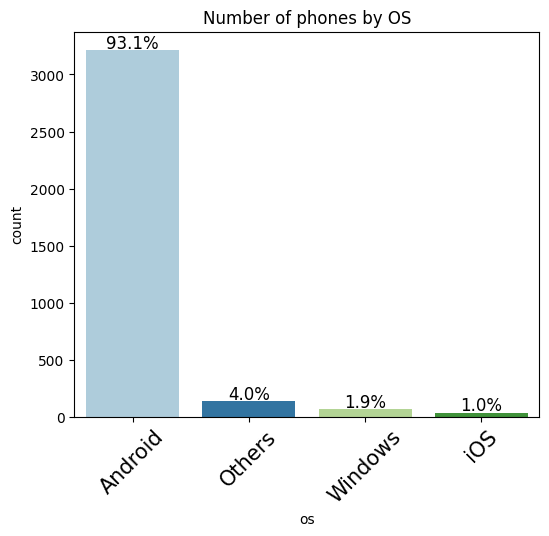

In [ ]:
labeled_barplot(df, "os", perc=True, title_name = 'Number of phones by OS')

#### 4G and 5G phones

In [ ]:
df.groupby('4g')['4g'].count().sort_values(ascending = False)

4g
yes    2335
no     1119
Name: 4g, dtype: int64

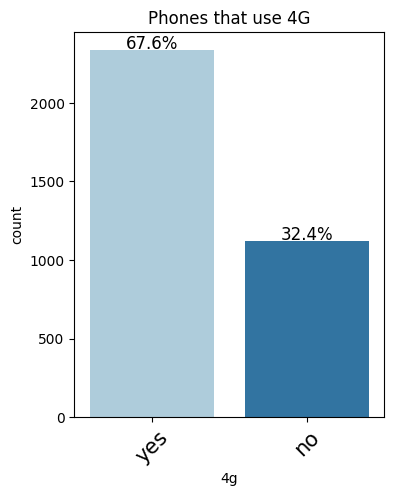

In [ ]:
labeled_barplot(df, "4g", perc=True, title_name = 'Phones that use 4G')

In [ ]:
df.groupby('5g')['5g'].count().sort_values(ascending = False)

5g
no     3302
yes     152
Name: 5g, dtype: int64

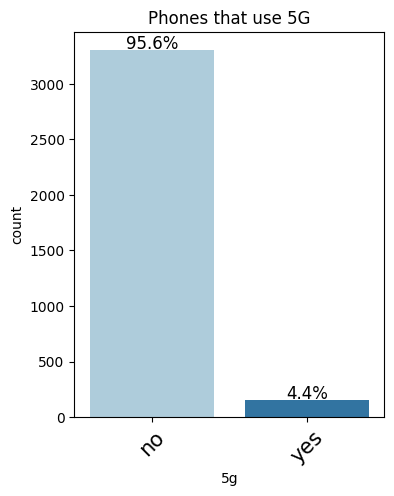

In [ ]:
labeled_barplot(df, "5g", perc=True, title_name = 'Phones that use 5G')

Not that many phones have 5G functionality; only about 4% do, while 67% have 4g capability.

### Numerical Features

In [ ]:
#create a funciton to plot the boxplot and histogram of our features

def histogram_boxplot(data, column_name):
    # Create a figure with two subplots stacked vertically
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot the boxplot on the first subplot
    sns.boxplot(x=data[column_name], ax=ax1)
    ax1.set_title(f'Boxplot for: {column_name}')

    # Plot the histogram on the second subplot
    sns.histplot(data[column_name], kde=True, ax=ax2)
    ax2.set_title(f'Histogram for: {column_name}')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

#### Release Year

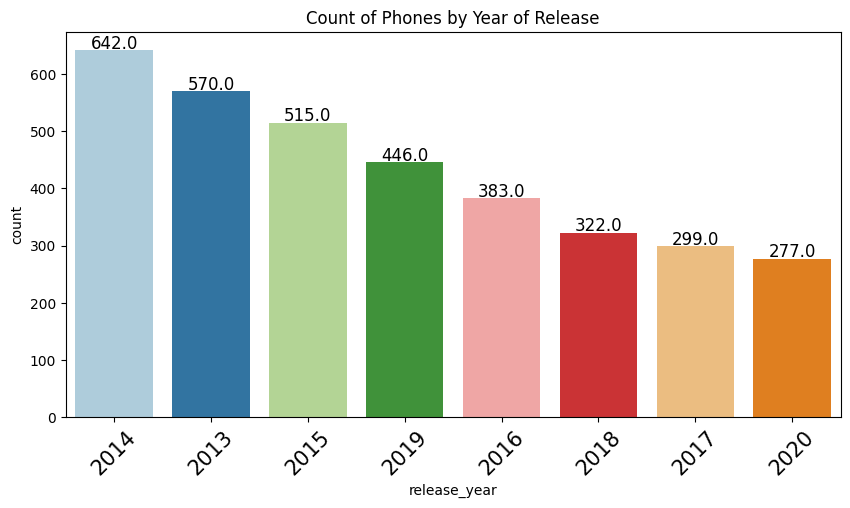

In [ ]:
labeled_barplot(df, "release_year", title_name = 'Count of Phones by Year of Release')

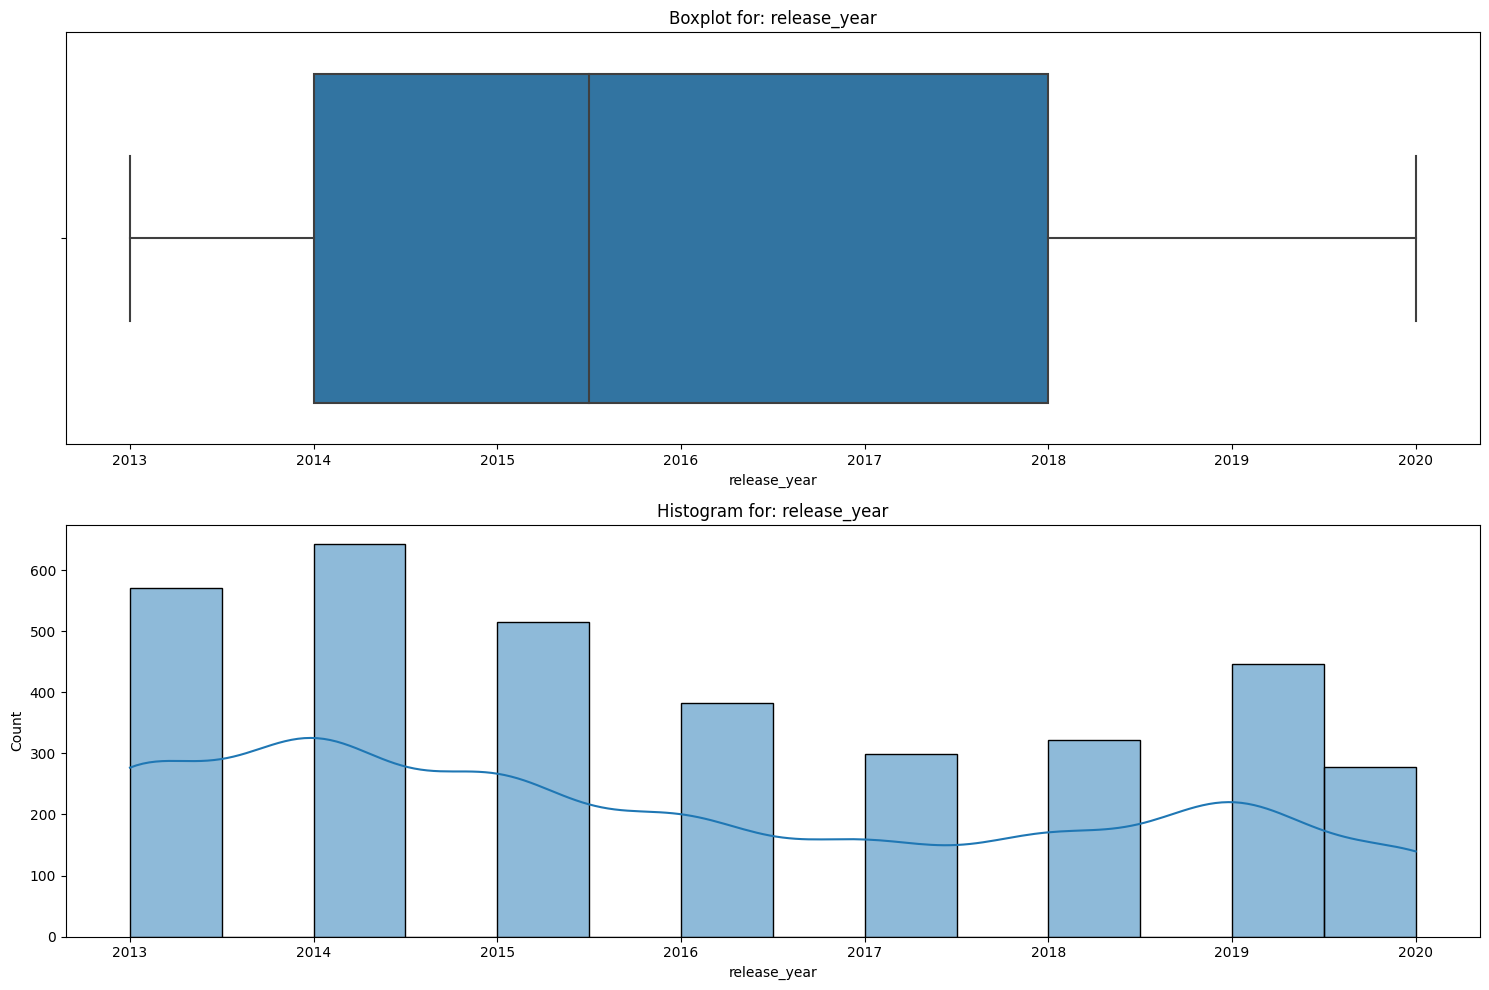

In [ ]:
histogram_boxplot(df, "release_year")

The data appears to have a decreasing amount of phones by release year. This makes sense as people tend to sell their phones after using them for some time. The longer the time frame, the more likely we'd see to have a used phone.

#### Screen size

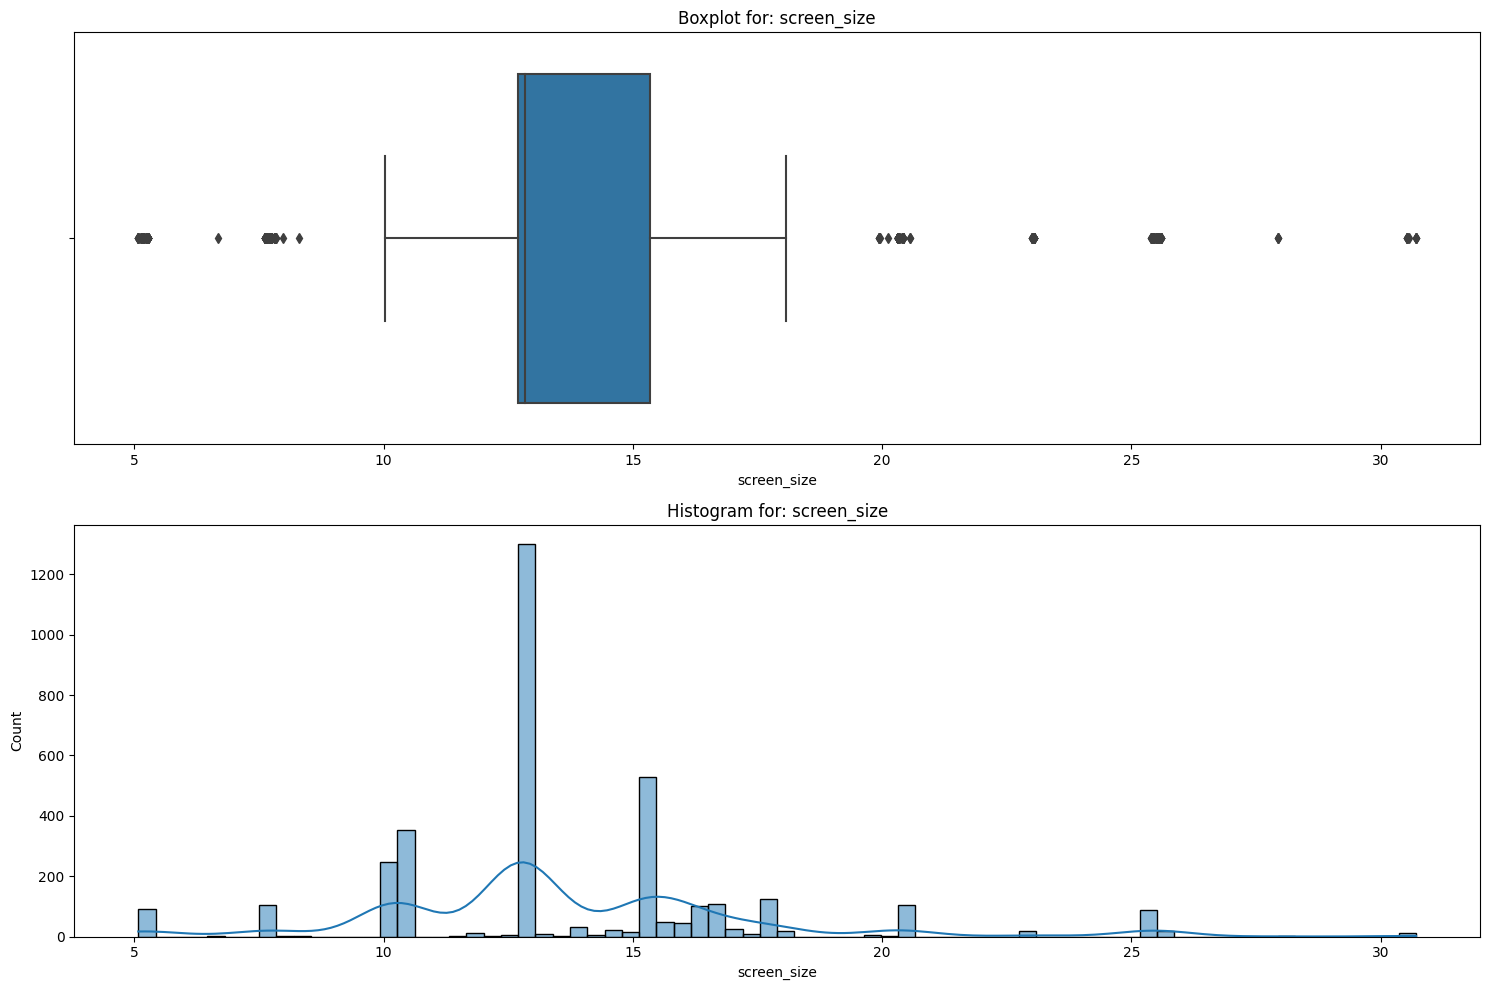

In [ ]:
histogram_boxplot(df, "screen_size")

#### Main Camera MP

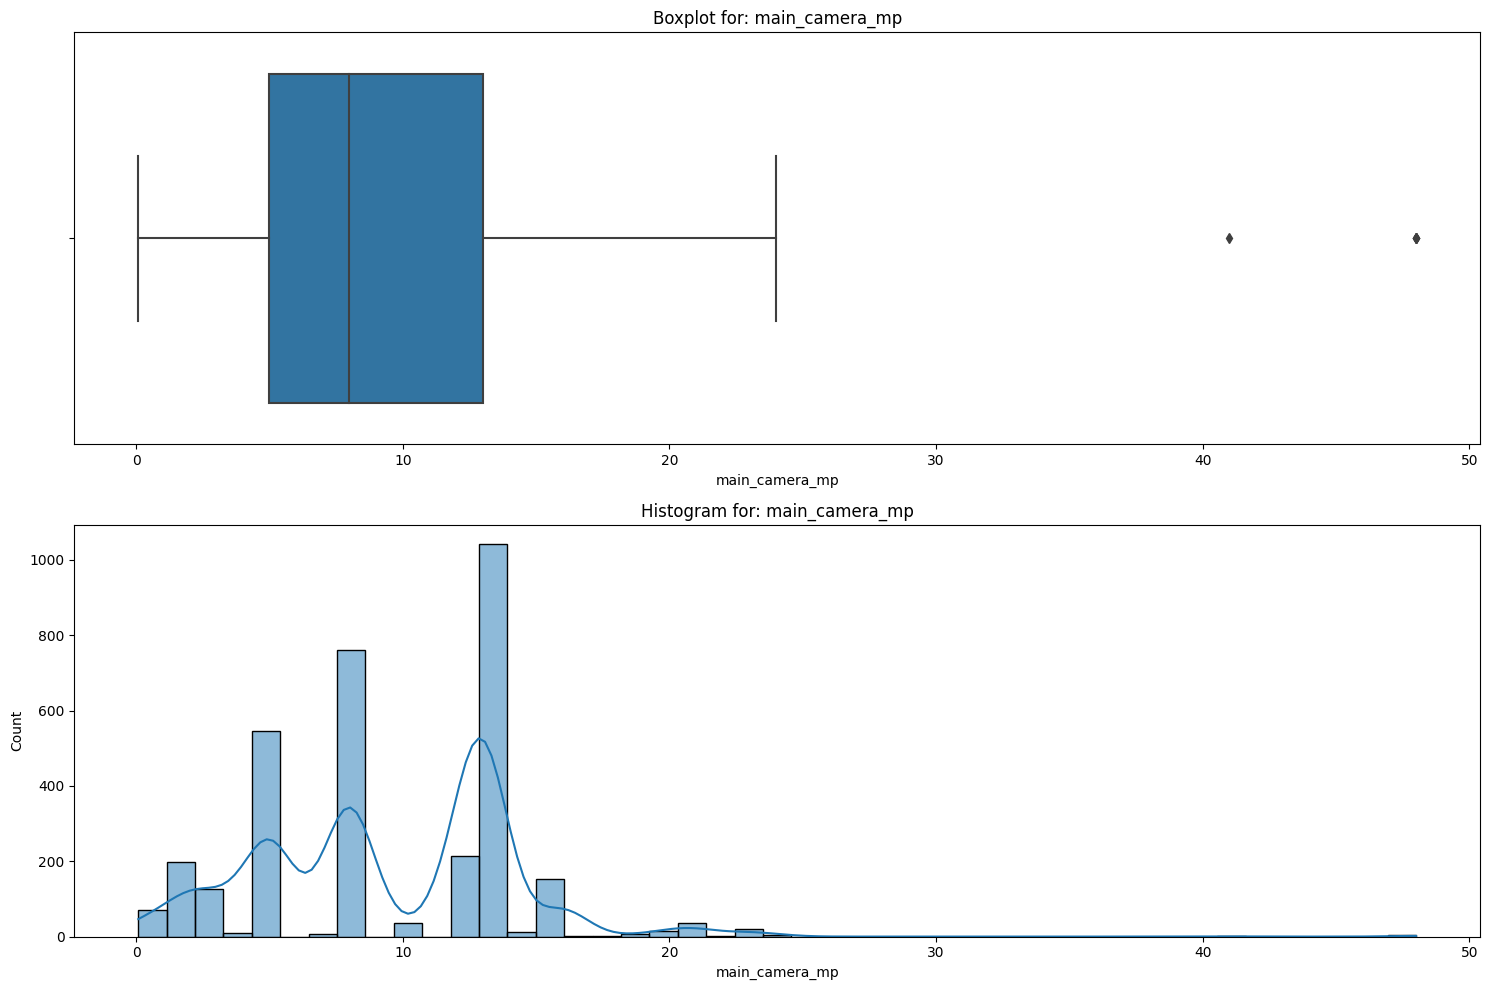

In [ ]:
histogram_boxplot(df, "main_camera_mp")

In [ ]:
df.groupby('main_camera_mp')['main_camera_mp'].count().sort_values(ascending = False)

main_camera_mp
13.00    1035
8.00      755
5.00      546
12.00     189
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
23.00      19
21.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
6.70        4
12.50       4
6.50        4
48.00       4
21.20       2
41.00       1
22.60       1
22.50       1
21.50       1
0.08        1
20.20       1
20.10       1
18.00       1
16.30       1
1.20        1
1.00        1
12.60       1
Name: main_camera_mp, dtype: int64

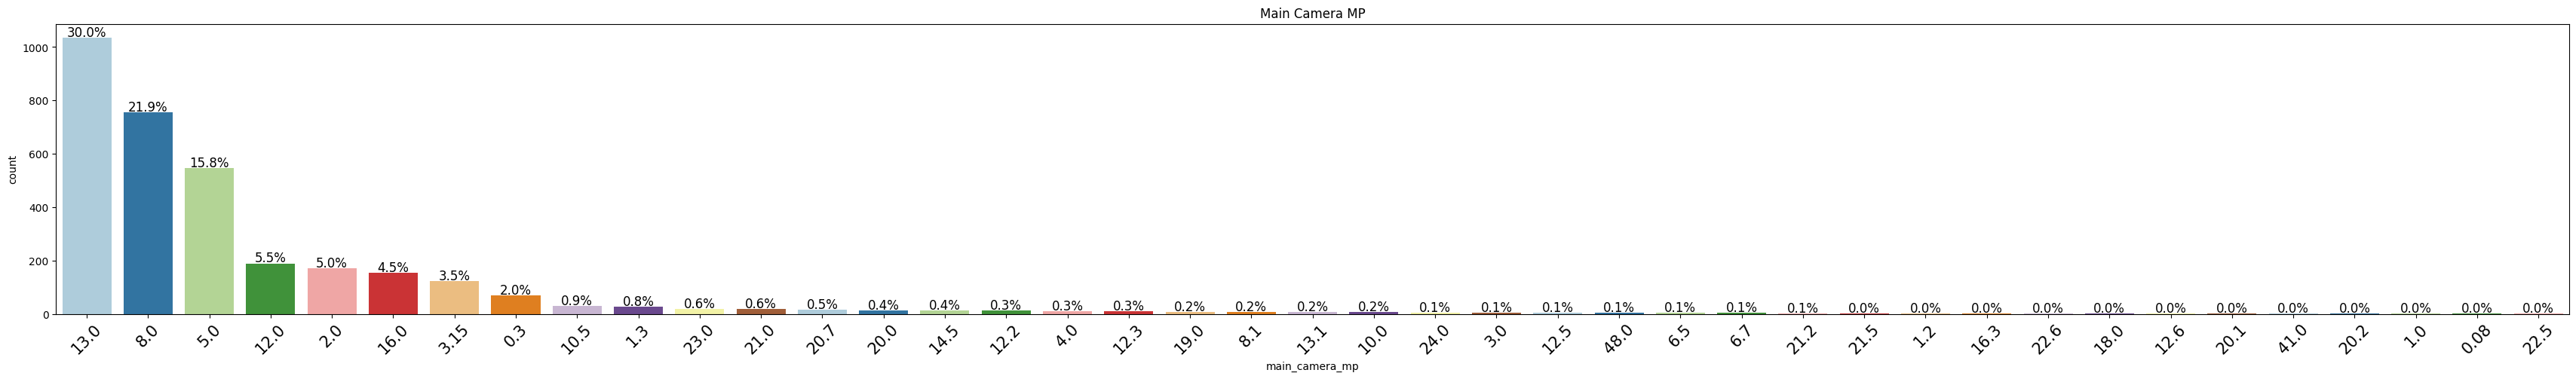

In [ ]:
labeled_barplot(df, "main_camera_mp", perc=True, title_name = 'Main Camera MP')
# just want to look at the distribution of MP count of the devices

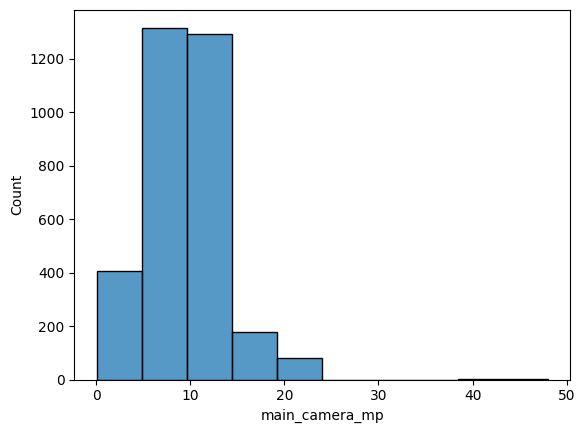

In [ ]:
#plotting histogram with less bins
sns.histplot(data = df, x = 'main_camera_mp', bins = 10);

#### Selfie Camera MP

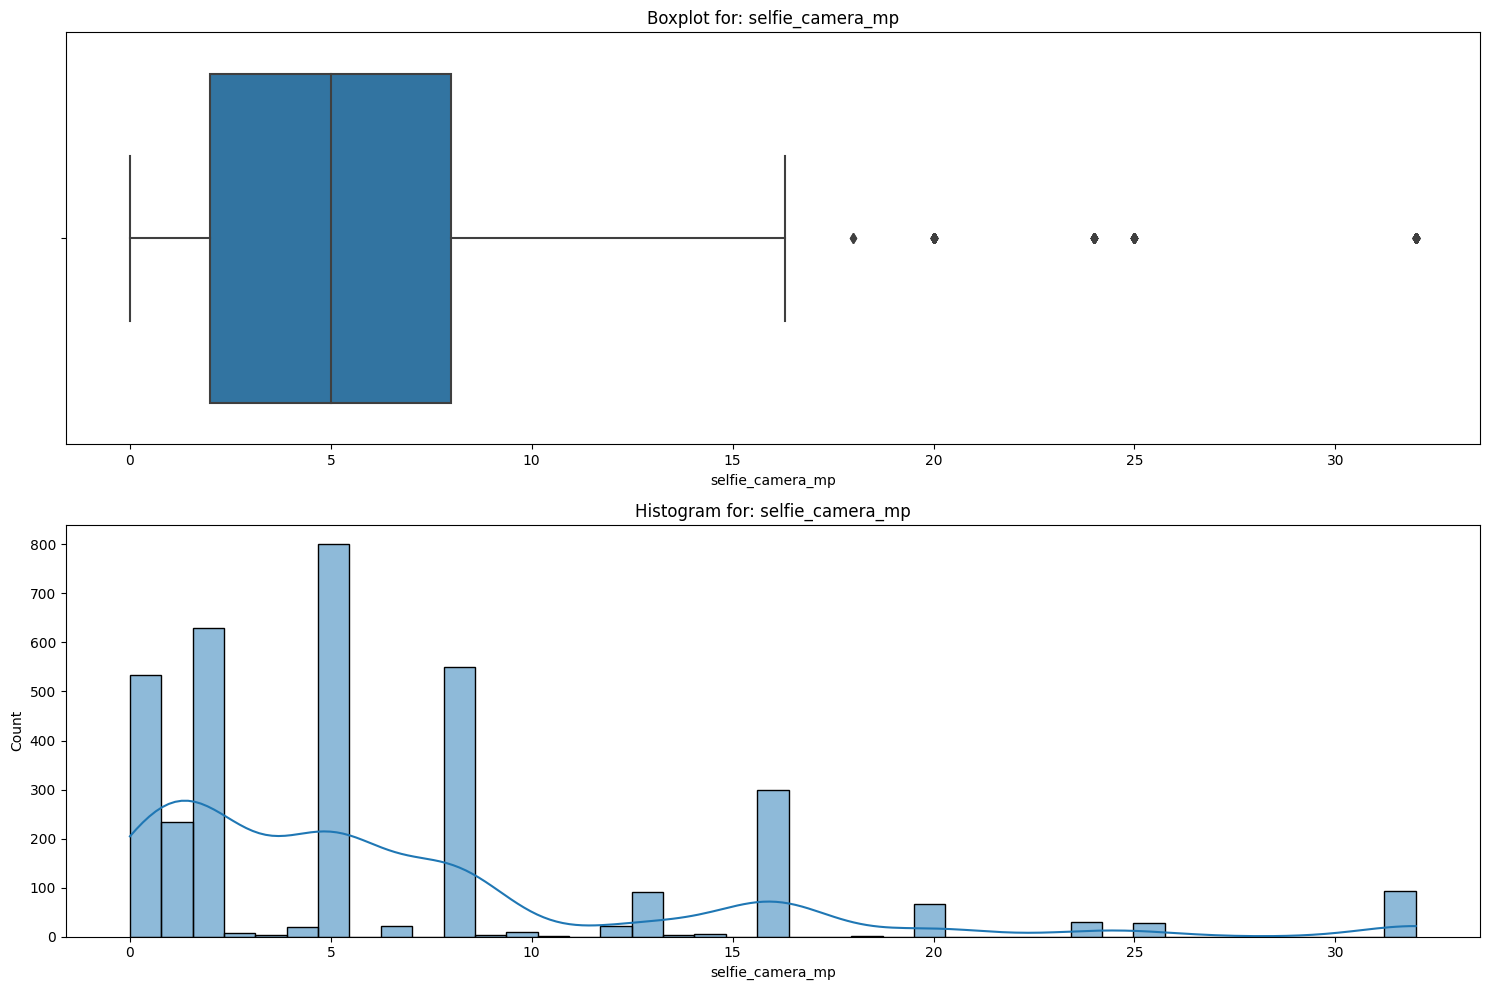

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

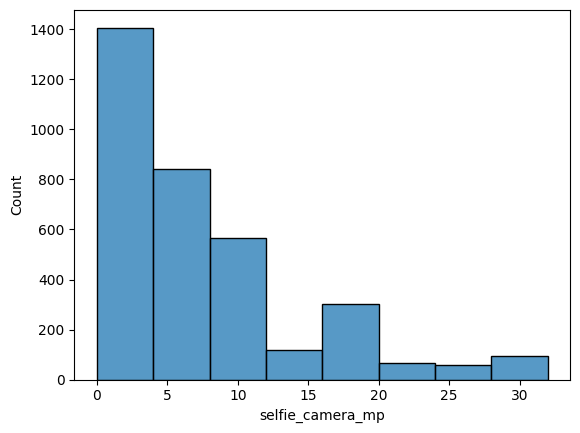

In [ ]:
#plotting histogram with less bins
sns.histplot(data = df, x = 'selfie_camera_mp', bins = 8);

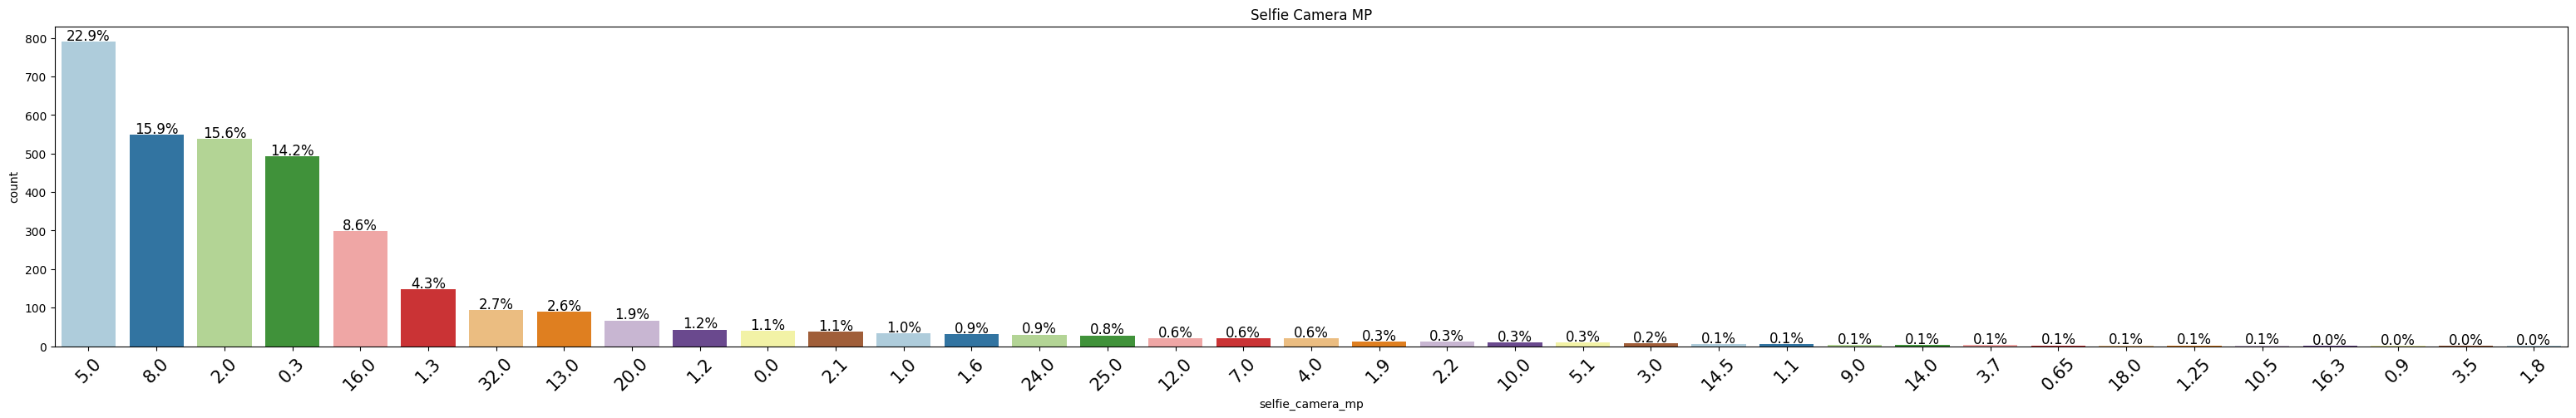

In [ ]:
labeled_barplot(df, "selfie_camera_mp", perc=True, title_name = 'Selfie Camera MP')

#### Internal Memory

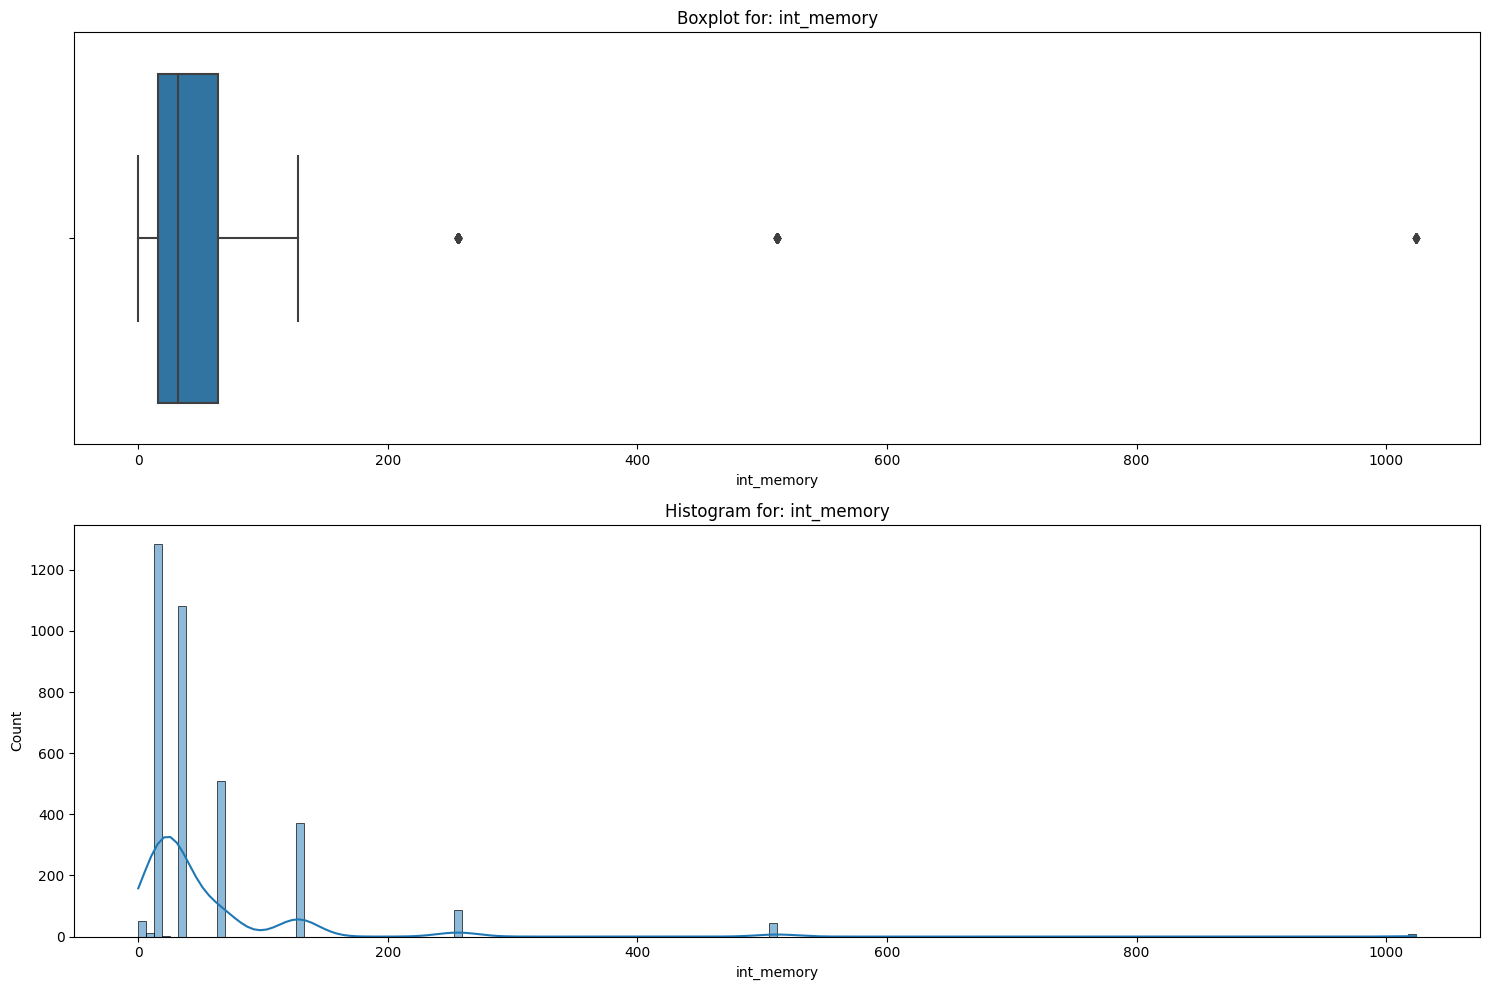

In [ ]:
histogram_boxplot(df, "int_memory")

In [ ]:
df.groupby('int_memory')['int_memory'].count().sort_values(ascending = False)

int_memory
16.00      1283
32.00      1083
64.00       509
128.00      372
256.00       86
512.00       44
0.06         18
0.10         17
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
0.01          1
24.00         1
Name: int_memory, dtype: int64

For phones today, most come with the following internal memory: 16,32, 64, 128, 256, 512, and 1024. However, there are a few that appear to be older that might have 8 or 4gb of internal memory. What's interesting is to note there are a few outliers, which I believe can be attributed human error.

#### RAM

In [ ]:
df.groupby('ram')['ram'].count().sort_values(ascending = False)

ram
4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
0.02       18
12.00      18
0.03       17
0.50        9
1.50        1
Name: ram, dtype: int64

Similarly, RAM memory tends to come in certain amounts. Let's have a look at how these are distributed by phone

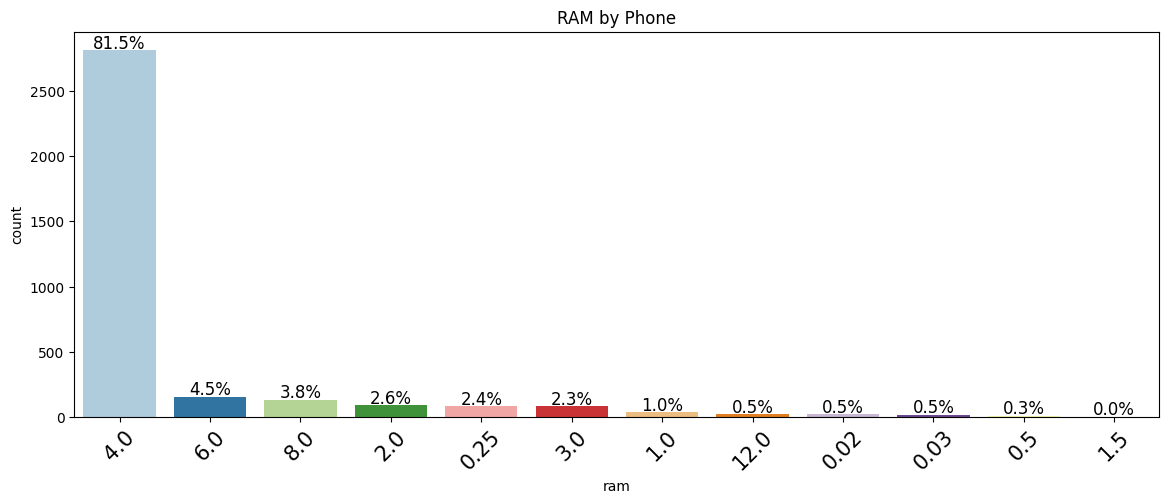

In [ ]:
labeled_barplot(df, "ram", perc=True, title_name = 'RAM by Phone')

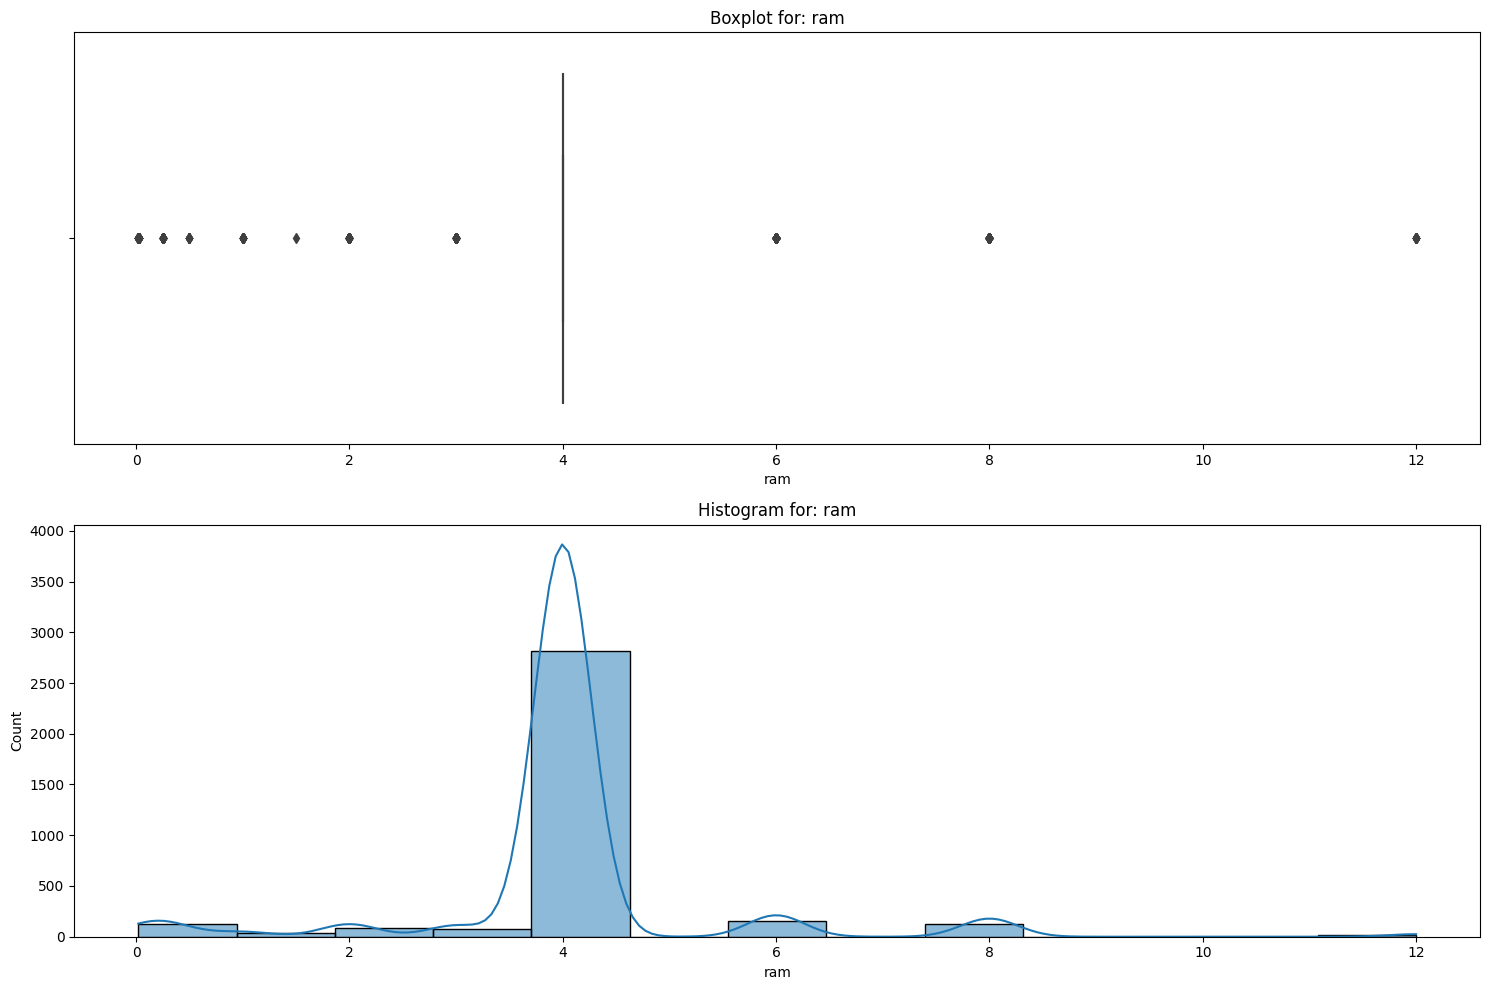

In [ ]:
histogram_boxplot(df, "ram")

#### Battery

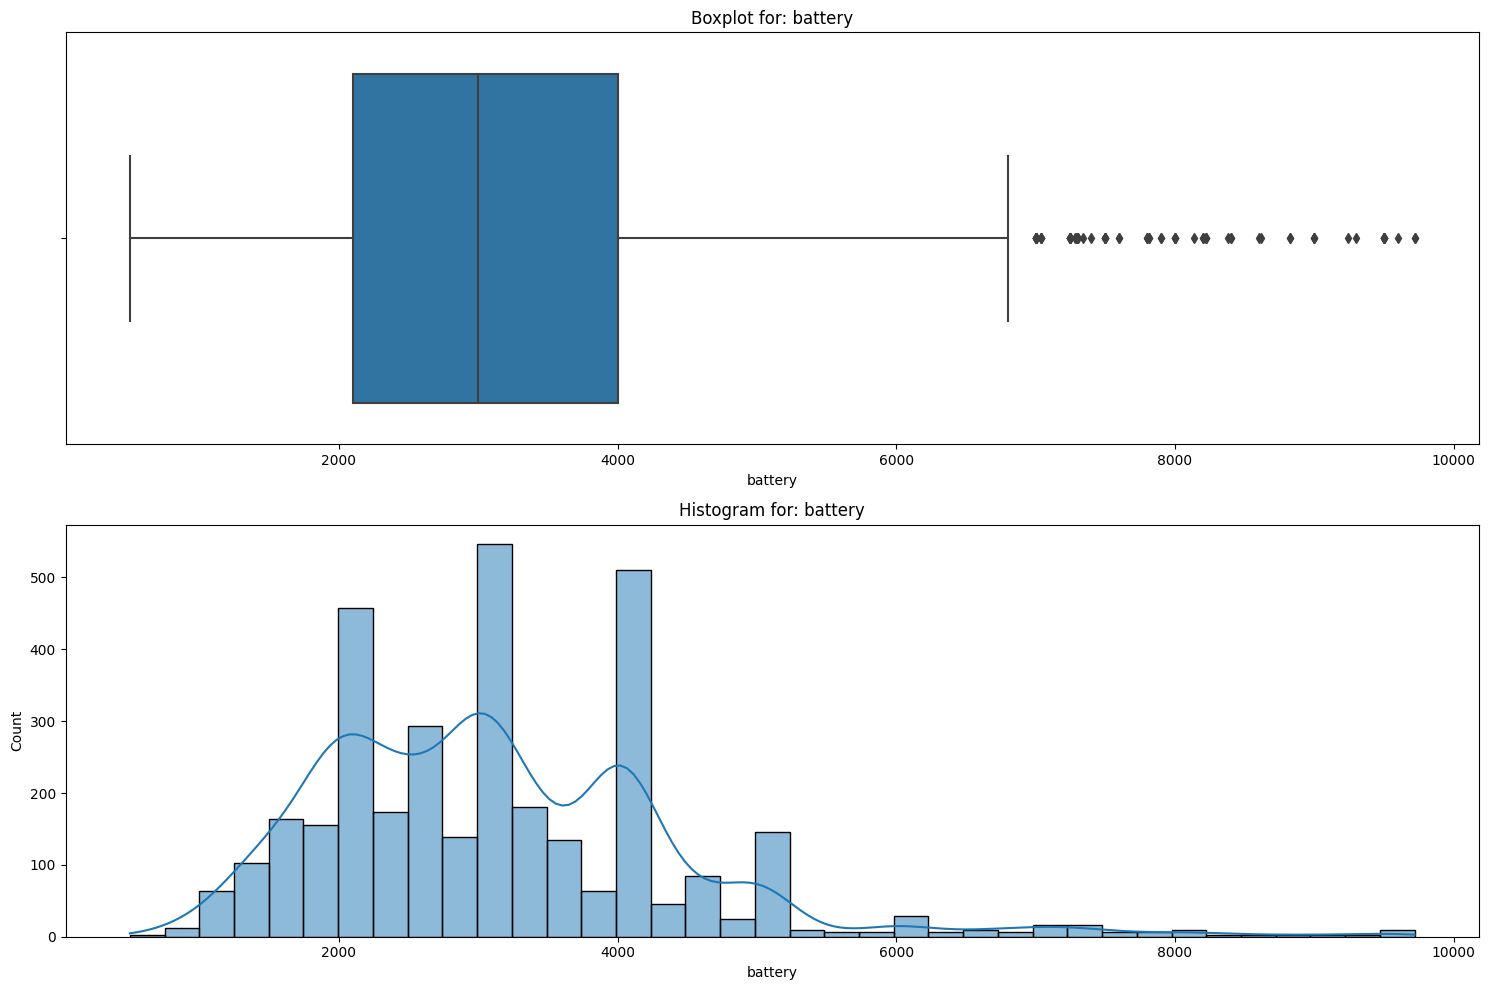

In [ ]:
histogram_boxplot(df, "battery")

The battery capacity of phones appears to be quite distirbuted from a minimum of 500 mAh to 4000 mAh.

#### Weight

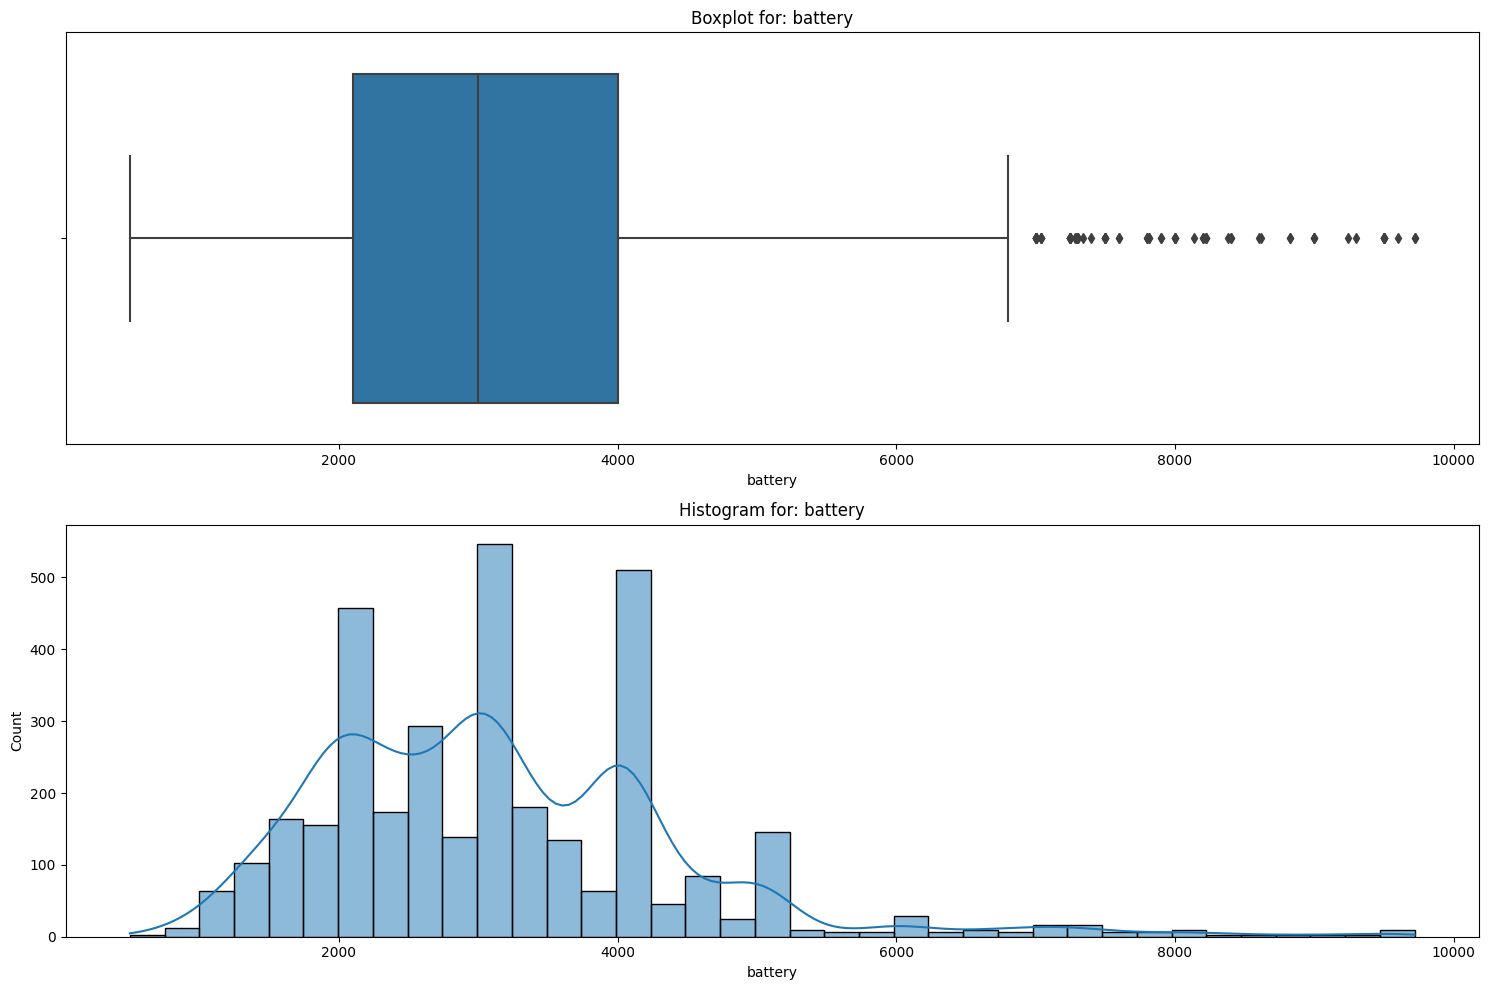

In [ ]:
histogram_boxplot(df, "battery")

We seem to have a lot of outliers when it comes to battery weight skewed to the left

#### Normalized Used Price

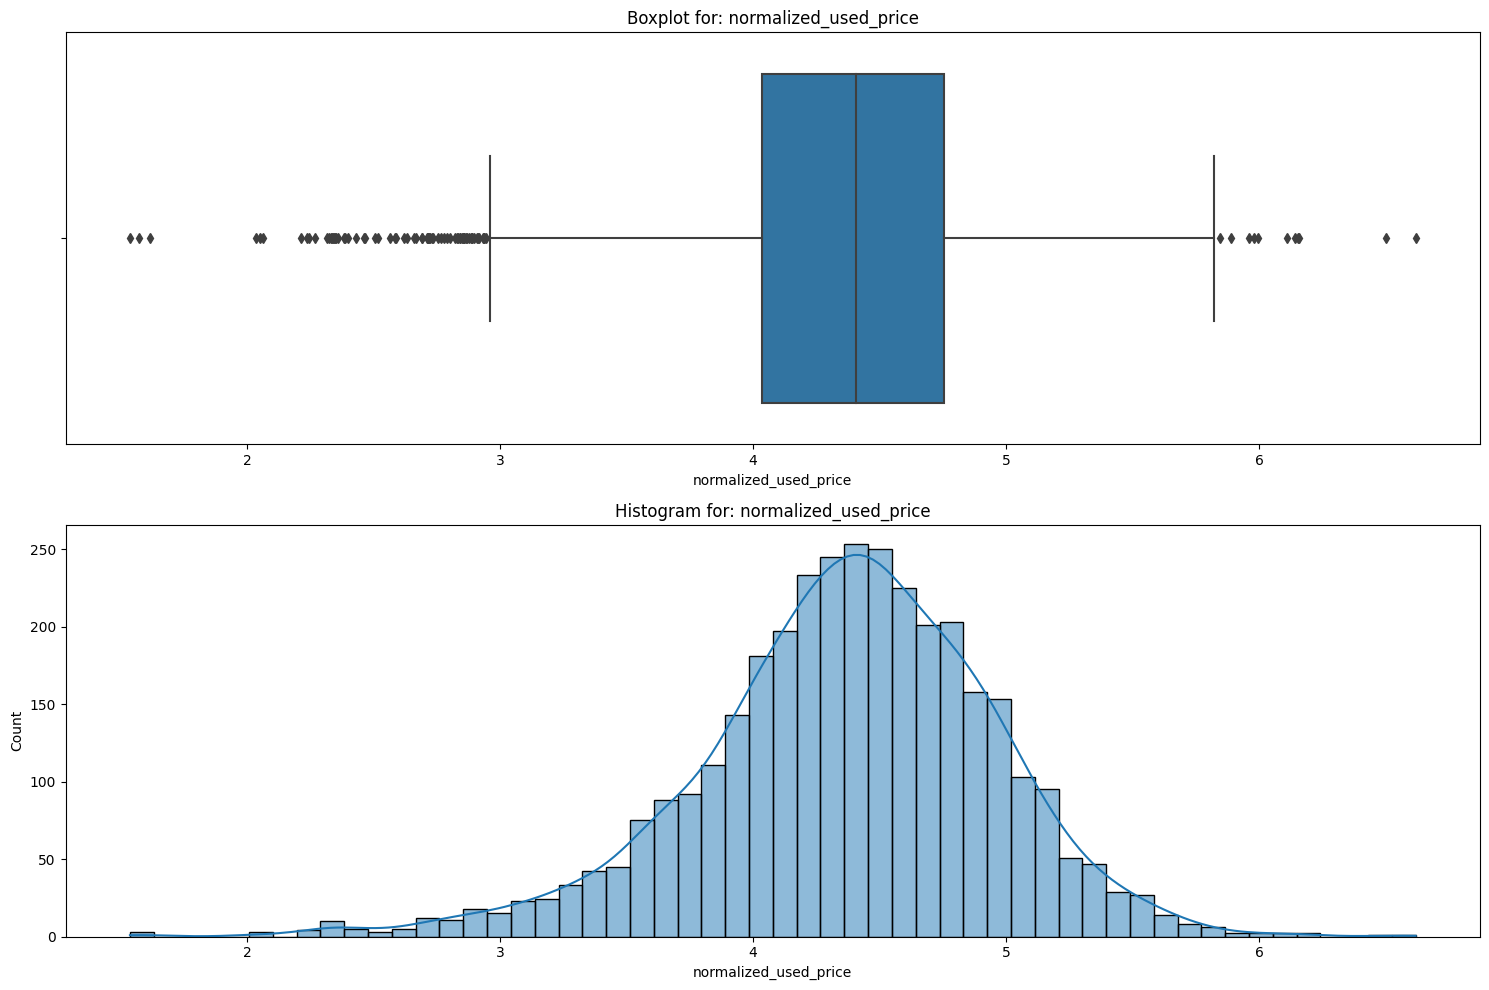

In [ ]:
histogram_boxplot(df, "normalized_used_price")

Initial observations indicate that the used priced is skewed slightly to the left.

#### Normalized New Price

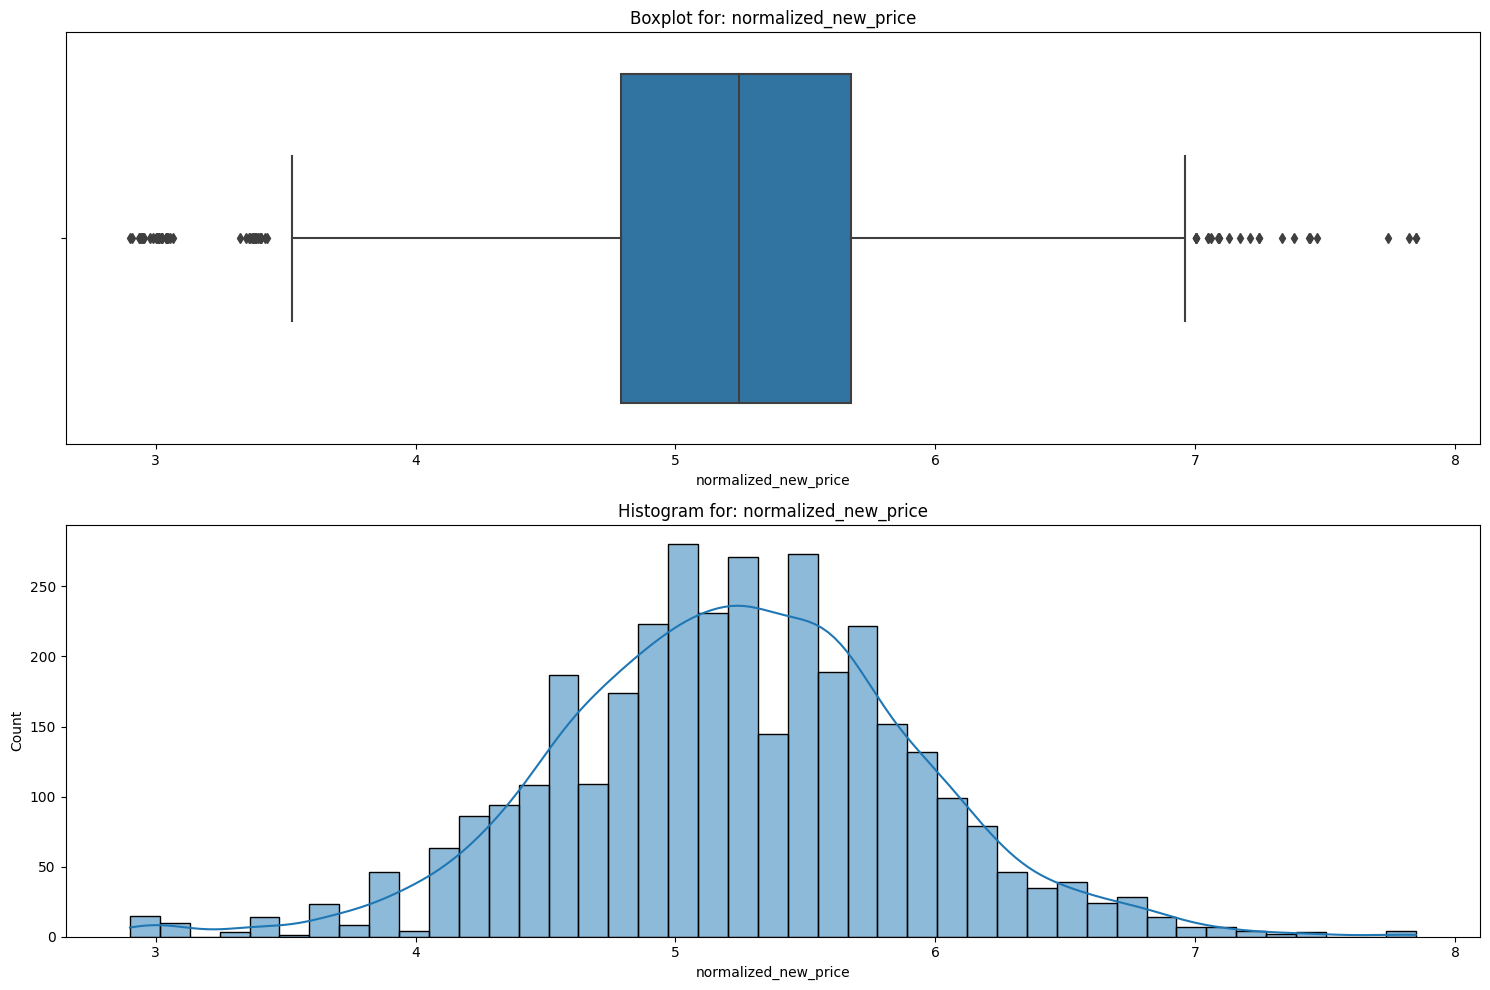

In [ ]:
histogram_boxplot(df, "normalized_new_price")

The distribution of new price of phones not only appears to resemble a slight normal distribution, but there are a lot of outliers in both tails.

## Bivariate Analysis

Let's explore some relationship amongst features. Particularly, we want to observe both the relationship between features as to how these relate to the normalized used price. First off, I want to look for correlation amongst features. Ideally, we'd want features to be linearly independent (i.e. no multicollinearity). To see this, let's create a correlation plot.

#### Correlation Check

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols


['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

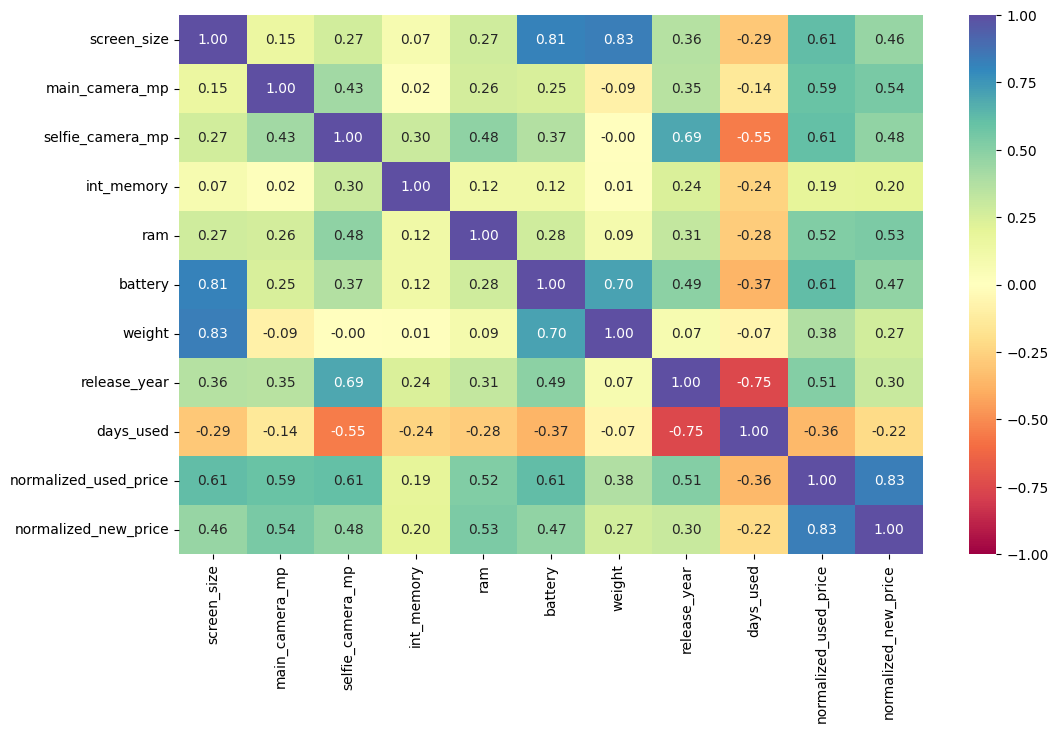

In [ ]:
# drop numerical features that are categorical in nature

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There are a few interesting insights when it comes to these correlations:


*   Battery and Weight are quite correlated to screensize, which would make sense given that larger sized phones require more batter and tend to be heavier.
*   In addition, normalized new price and used price are also heavily correlated. This would make sense as they both measure price before and after use. So this could tell us that the drop in price from new to use is quite correlated across the sample of phones.
*   In addition, we see that `screen_size`, `main_camera_mp`, `selfie_camera_mp`, `ram`, and `battery` have a correlation higher than 0.50, which is quite high for our sample.


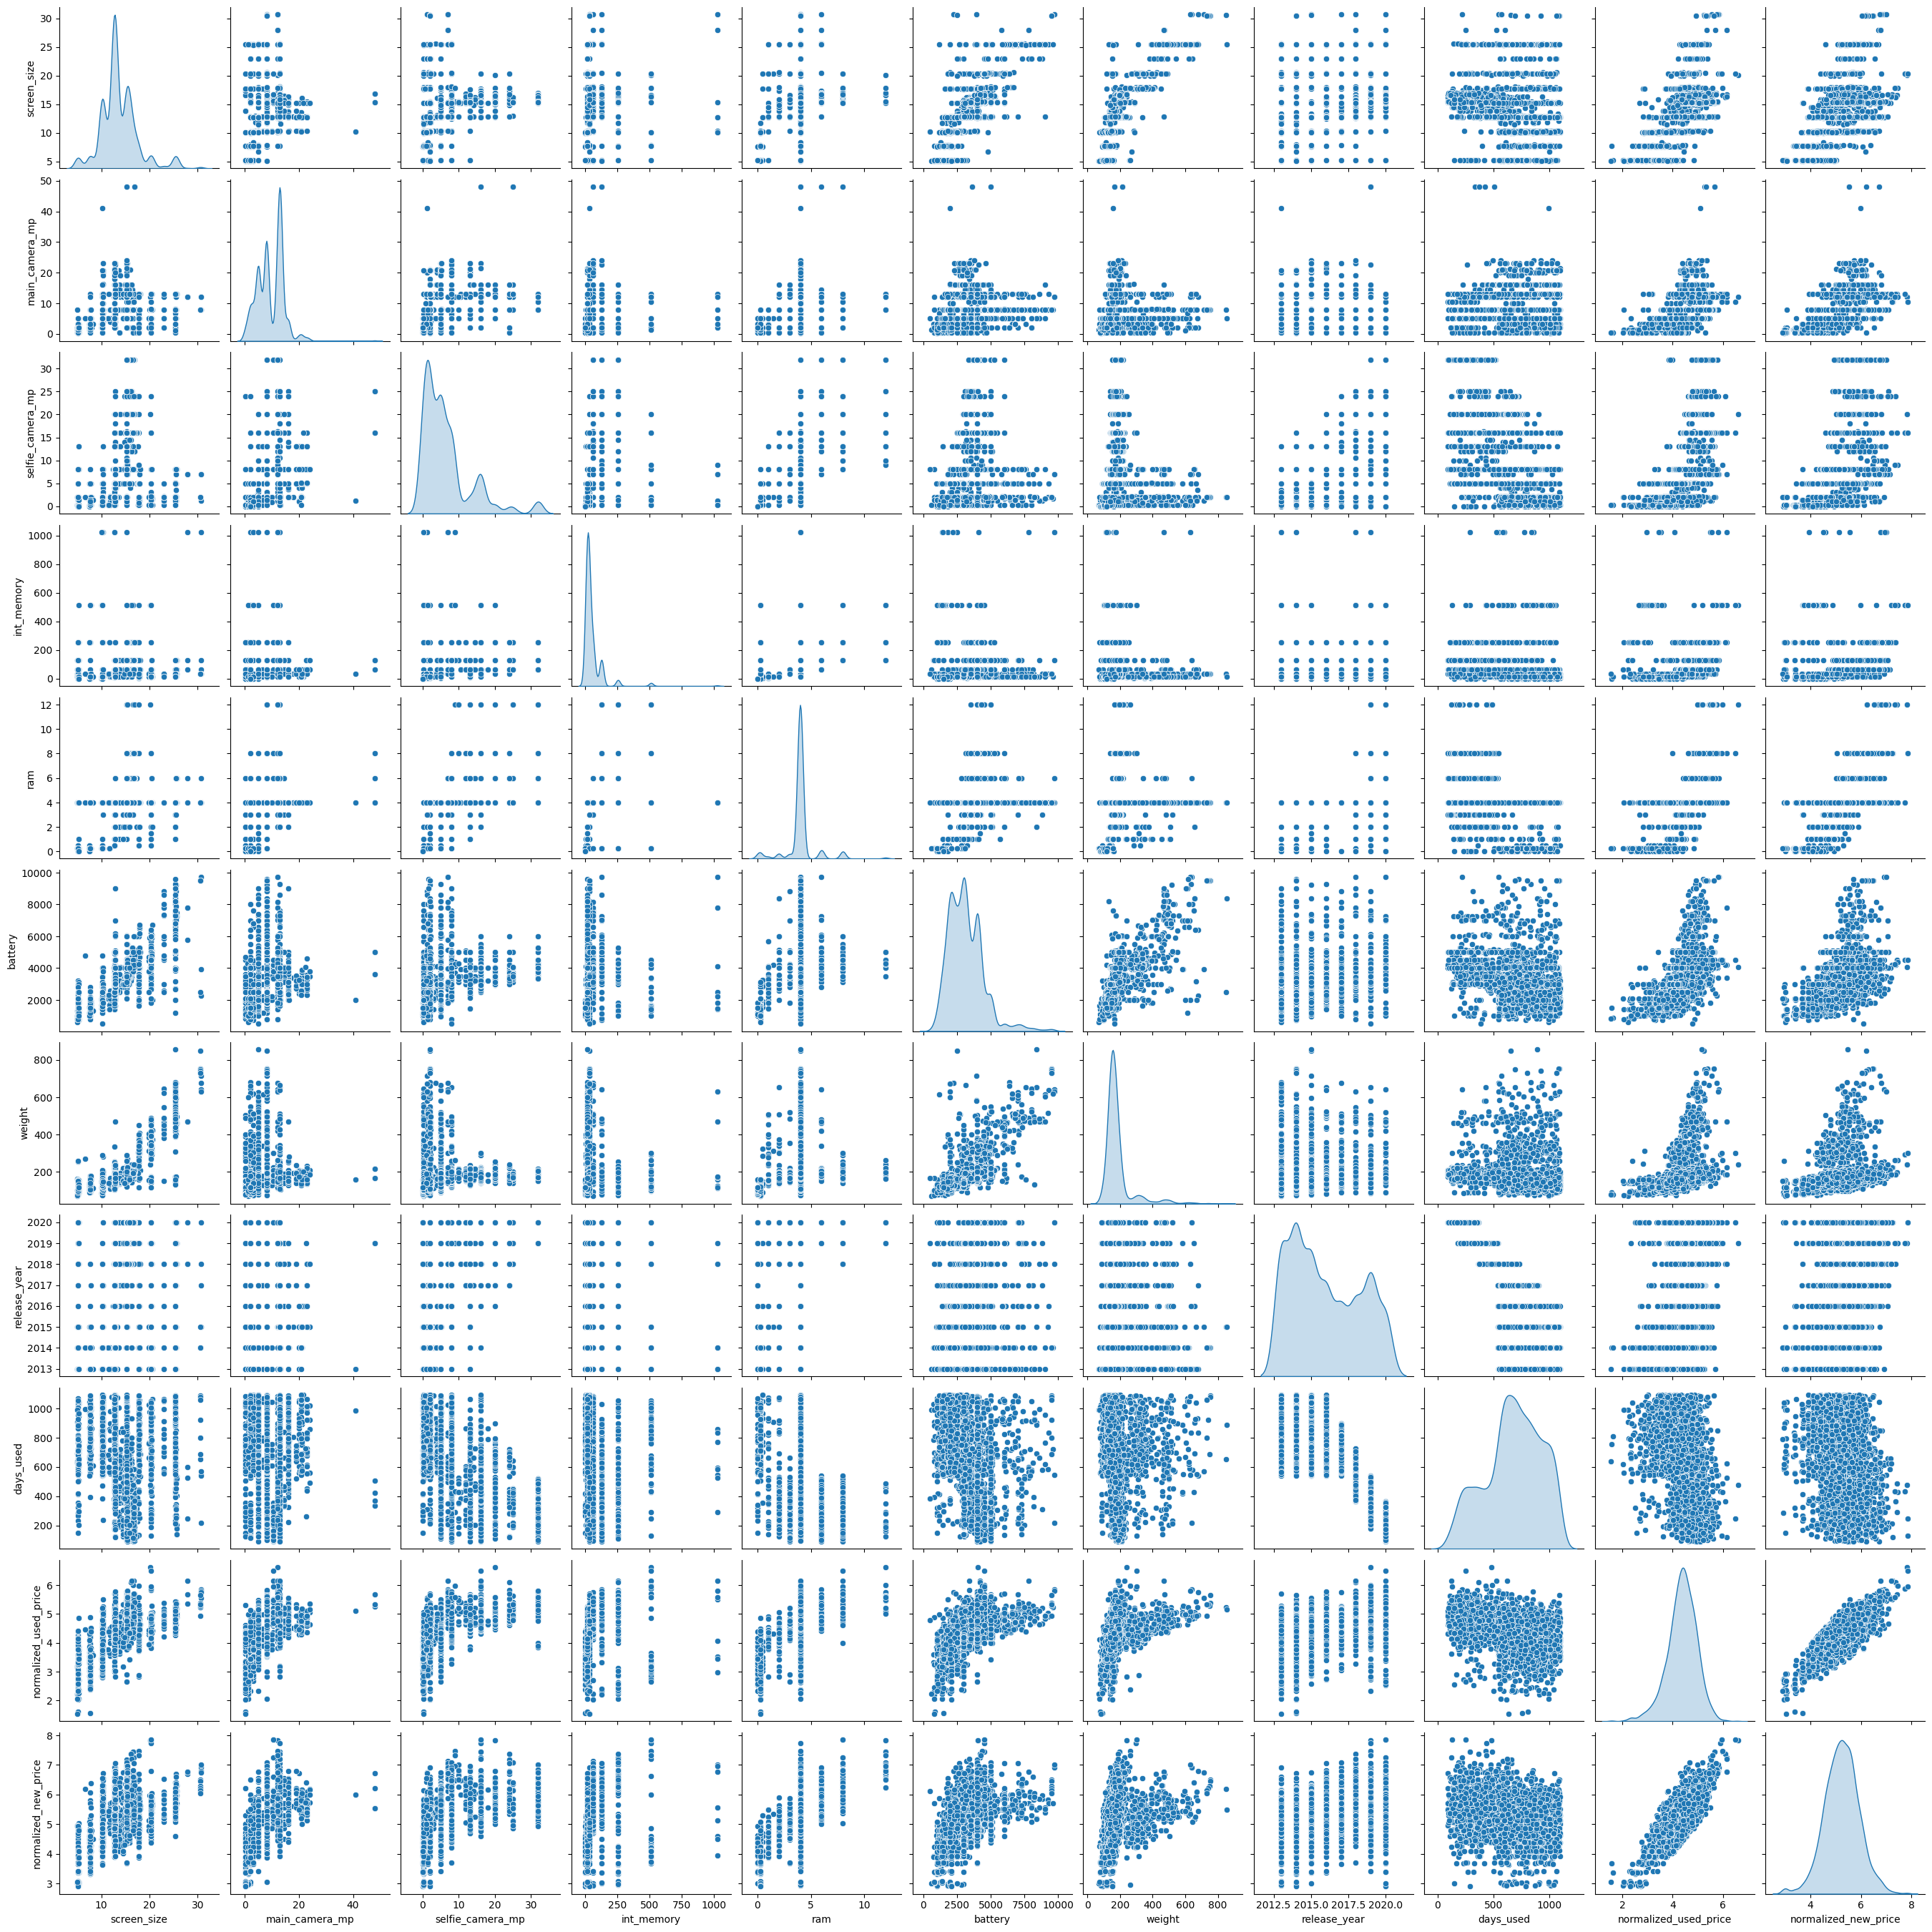

In [ ]:
#plotting the relationship between each variable
sns.pairplot(data=df, diag_kind='kde')

#### RAM by Phone Brand

In [ ]:
ram_by_brand = df.groupby(['brand_name'])['ram'].mean().sort_values(ascending = False)
ram_by_brand

brand_name
OnePlus       6.363636
Oppo          4.961240
Vivo          4.756410
Huawei        4.655378
Honor         4.603448
Xiaomi        4.583333
Google        4.533333
Meizu         4.451613
Samsung       4.199413
Realme        4.195122
Sony          4.069767
Asus          4.049180
ZTE           4.023214
HTC           4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
Panasonic     4.000000
Coolpad       3.954545
Motorola      3.943396
LG            3.936567
Gionee        3.933036
Acer          3.901961
Lenovo        3.885965
BlackBerry    3.829545
Others        3.777888
Spice         3.750000
Micromax      3.679487
Alcatel       3.407025
Karbonn       3.353448
Lava          3.277778
Infinix       2.600000
Nokia         2.420294
Celkon        1.613636
Name: ram, dtype: float64

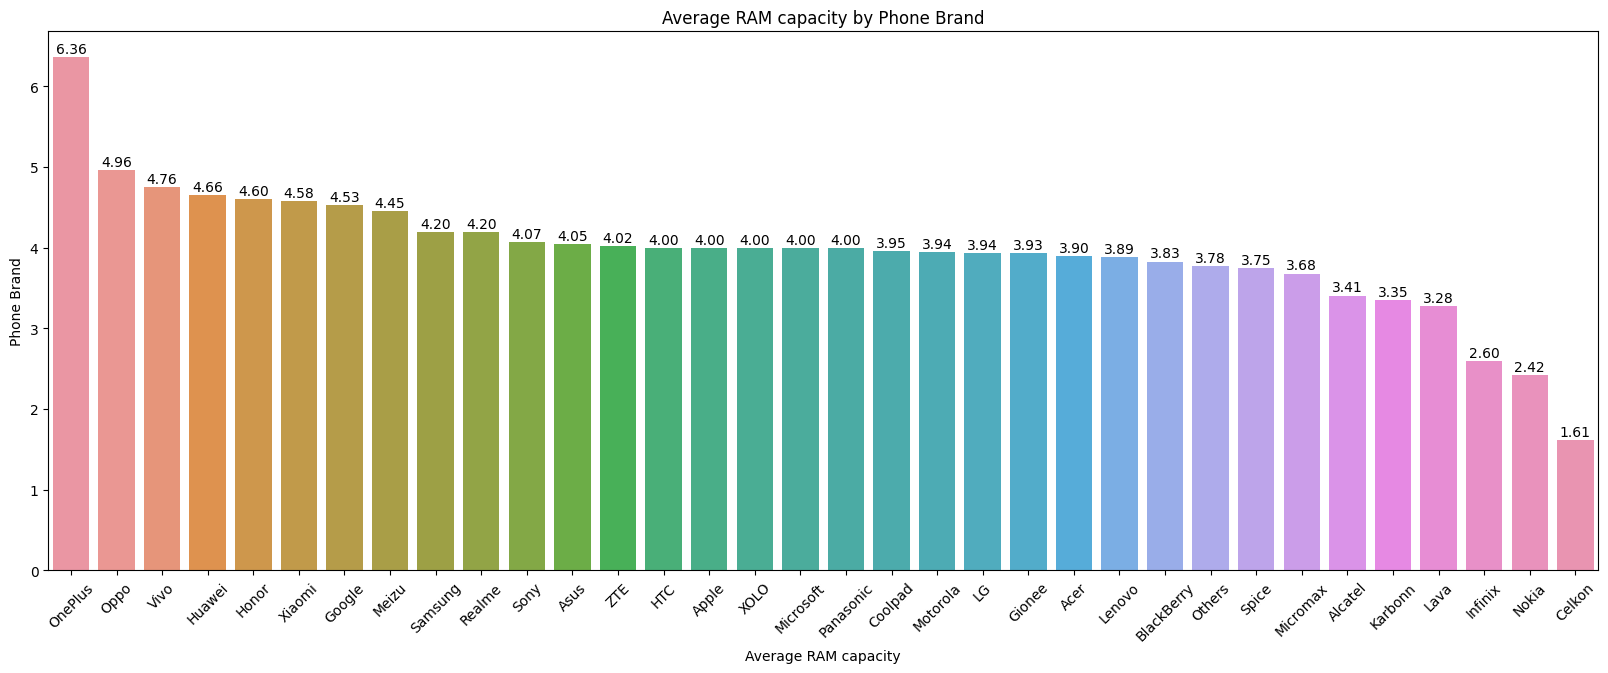

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Average RAM capacity by Phone Brand')
plot_val = sns.barplot(x=ram_by_brand.index, y=ram_by_brand)  # Barplot
plt.xlabel('Average RAM capacity')  # X-axis label
plt.ylabel('Phone Brand')  # Y-axis label

for p in plot_val.patches:
    height = p.get_height()
    plot_val.text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha='center')


plt.xticks(rotation=45)
plt.show();

OnePlus has the highest RAM in their phones by far compared to other brands. Followed by Oppo and Vivo, which have ~1 less GB or RAM

### Weight vs Batteries larger than 4500 mAh

I am looking specifically at batteries larger than 4500 because this is the industry standard considered for large electronic devices. So in essence, does having a large battery affect the variation of weight across the sample pool?

In [ ]:
df_large_battery = df[df['battery'] >= 4500][['weight','battery']]
df_large_battery.head()

weight  battery
3    480.0   7250.0
4    185.0   5000.0
11   185.0   5000.0
19   173.0   5100.0
20   173.0   5100.0

In [ ]:
df_large_battery.shape

(406, 2)

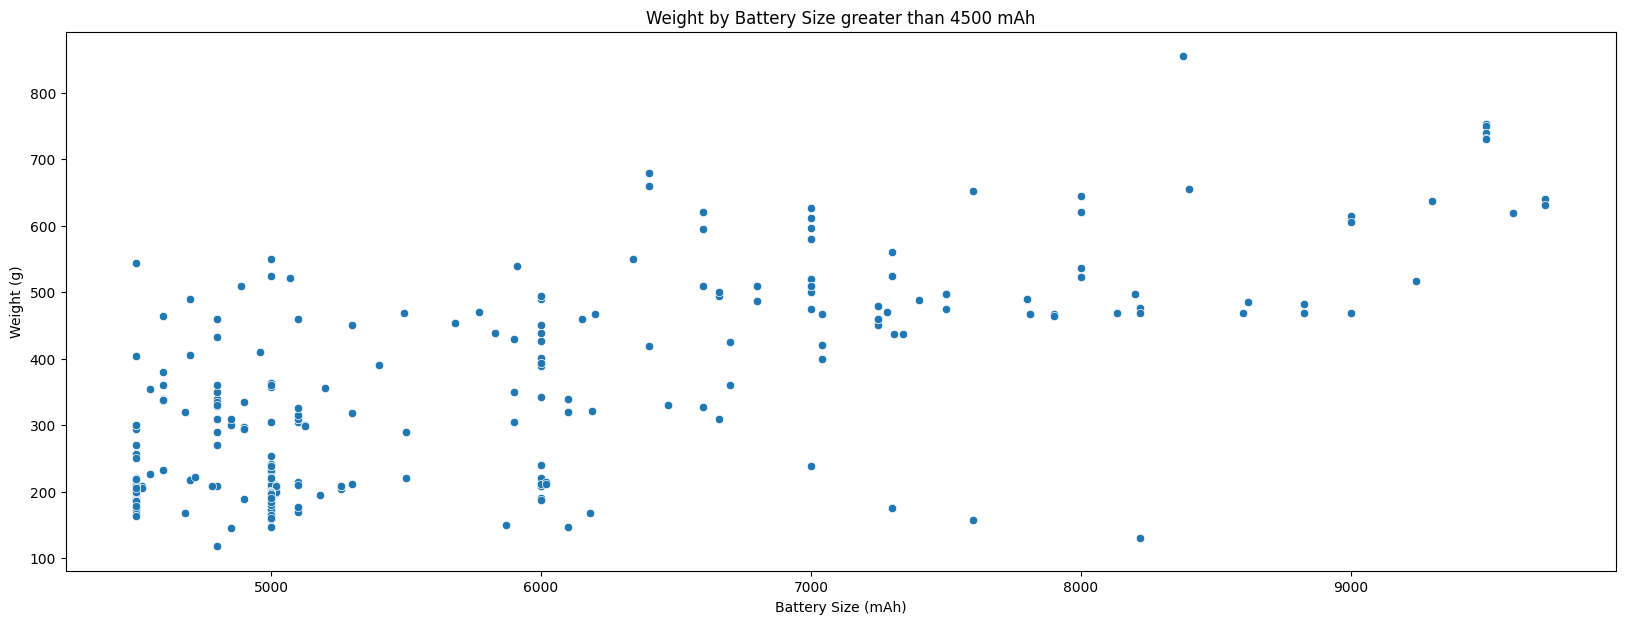

In [ ]:
#we have ~400 devices that have a large battery. Now I'll look at the distribution of this dataset to see if there's any significant relationship

plt.figure(figsize=(20,7))
plt.title('Weight by Battery Size greater than 4500 mAh')
plot_val = sns.scatterplot(data = df_large_battery, x = 'battery', y = 'weight')  # scatter plot
plt.xlabel('Battery Size (mAh)')  # X-axis label
plt.ylabel('Weight (g)')  # Y-axis label

plt.show();

**Observation**


*   There appears to be a positive correlation between battery size and weight.
*   Neverthless, there appear to be clusters of weight across several battery sizes. This means that even within devices that have the same battery size, the weight differs across the sample.



### Devices with large screens (> 6") by Brand

Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. So I want to see not only the amount of devices by brand, but also the proportion of these to smaller sized devices, and see if there's been any trend over time.

In [ ]:
threshold = 6

df['threshold_size'] = df['screen_size'].apply(lambda size: 'Large' if size >= threshold else 'Small')
df_screen = df[['brand_name', 'screen_size', 'release_year', 'threshold_size']]
df_screen.head()


brand_name  screen_size  release_year threshold_size
0      Honor        14.50          2020          Large
1      Honor        17.30          2020          Large
2      Honor        16.69          2020          Large
3      Honor        25.50          2020          Large
4      Honor        15.32          2020          Large

''

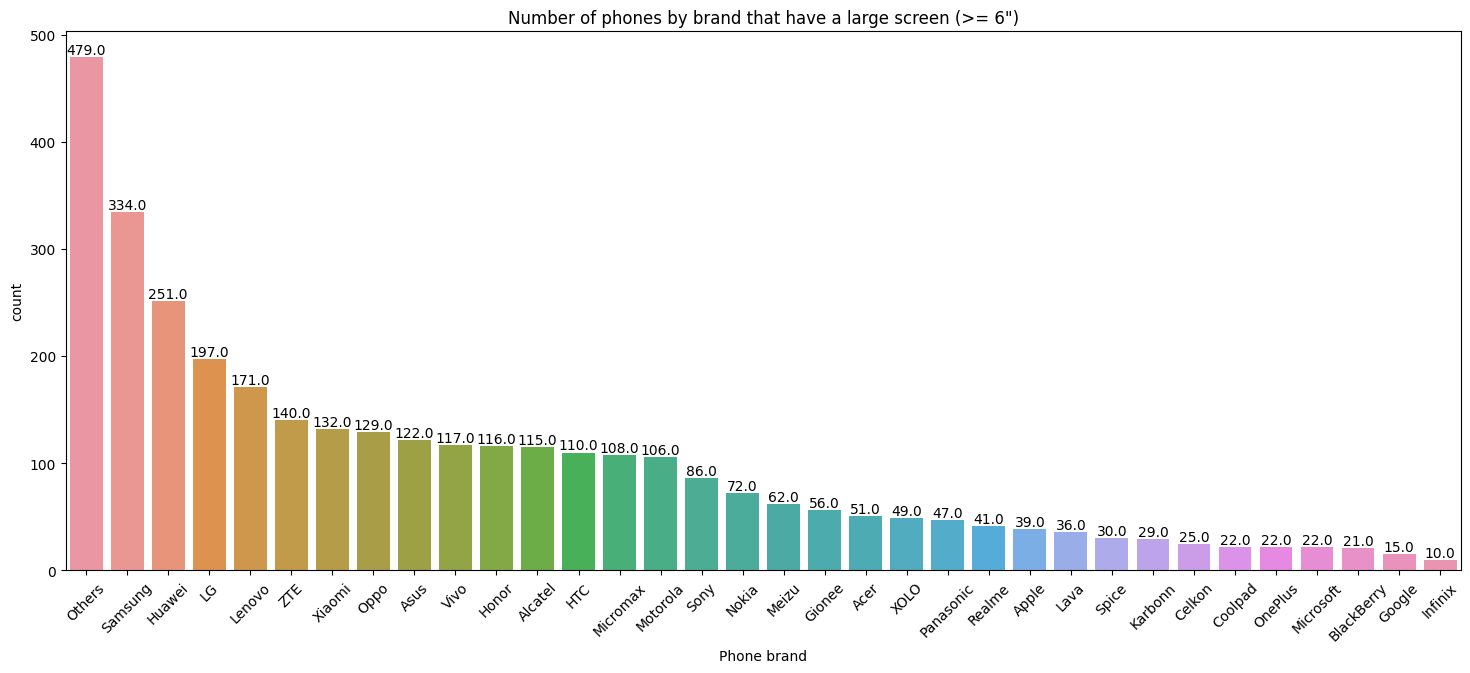

In [ ]:
#first, lets plot how differnt brands have different screen sizes that are considered large

df_large_screen = df[df['screen_size'] >= threshold]

#now I'll plot these to better visualize this data
plt.figure(figsize=(18,7))
ax = sns.countplot(data = df_large_screen, x = 'brand_name', order = df_large_screen['brand_name'].value_counts().index)
plt.title('Number of phones by brand that have a large screen (>= 6")')
plt.xlabel('Phone brand')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
;

In [ ]:
screen_size_by_year = df.groupby(['release_year'])['threshold_size'].value_counts().reset_index(name='count')
screen_size_by_year

release_year threshold_size  count
0           2013          Large    530
1           2013          Small     40
2           2014          Large    625
3           2014          Small     17
4           2015          Large    505
5           2015          Small     10
6           2016          Large    381
7           2016          Small      2
8           2017          Large    295
9           2017          Small      4
10          2018          Large    317
11          2018          Small      5
12          2019          Large    440
13          2019          Small      6
14          2020          Large    269
15          2020          Small      8

In [ ]:
#noramlized counts
screen_size_by_year = df.groupby(['release_year'])['threshold_size'].value_counts().reset_index(name='count')
screen_size_by_year

release_year threshold_size  count
0           2013          Large    530
1           2013          Small     40
2           2014          Large    625
3           2014          Small     17
4           2015          Large    505
5           2015          Small     10
6           2016          Large    381
7           2016          Small      2
8           2017          Large    295
9           2017          Small      4
10          2018          Large    317
11          2018          Small      5
12          2019          Large    440
13          2019          Small      6
14          2020          Large    269
15          2020          Small      8

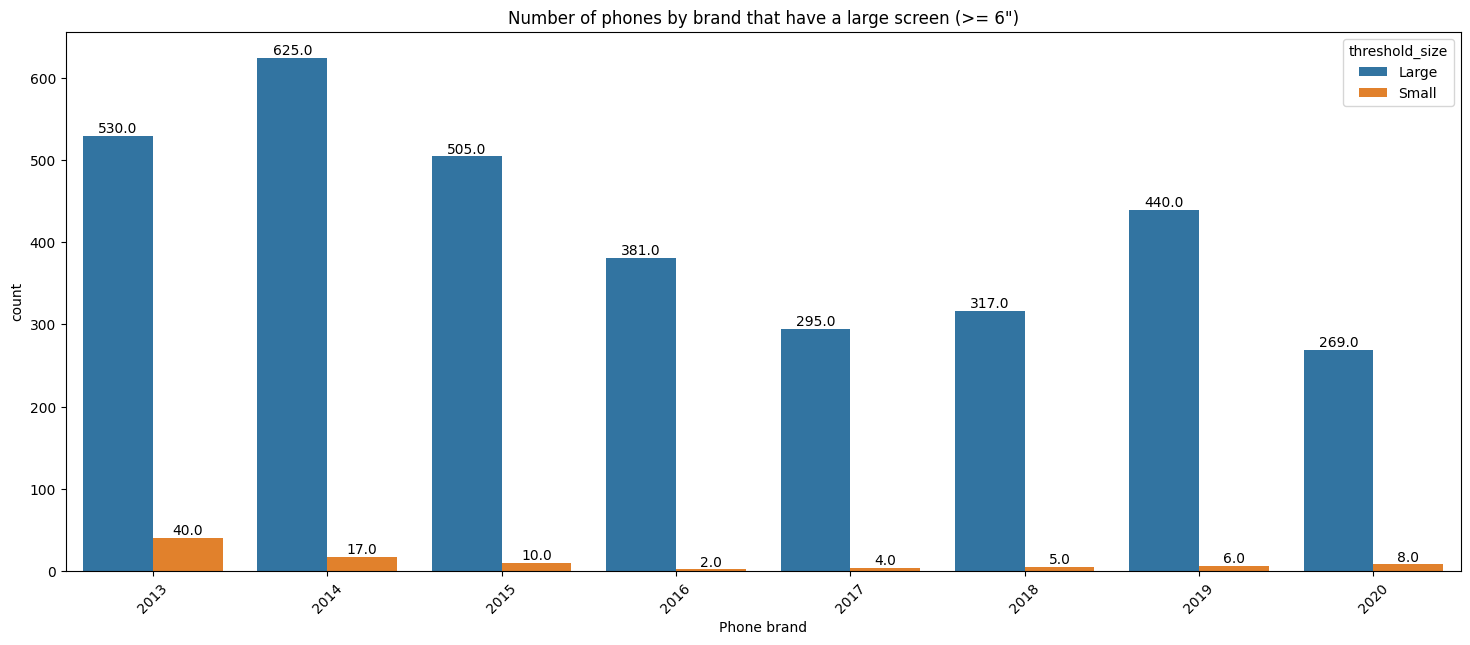

In [ ]:
#first, lets plot how differnt brands have different screen sizes that are considered large

#now I'll plot these to better visualize this data
plt.figure(figsize=(18,7))
ax = sns.barplot(data = screen_size_by_year, x = 'release_year', y = 'count', hue = 'threshold_size')
plt.title('Number of phones by brand that have a large screen (>= 6")')
plt.xlabel('Phone brand')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom');

**Observations**


*   We can see that the vast majority of devices have a screen size greater than 6"
*   In addition, we see that there has been a shift towards larger screen sizes, with an initial 92% of phones having a large screen in 2013 to ~98% of phones in 2020 for this sample


### Phones with Selfie Cameras greater than 8 MP

A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
selfie_8mp = df[['brand_name', 'selfie_camera_mp']][df['selfie_camera_mp'] >= 8]
selfie_8mp.head()

brand_name  selfie_camera_mp
1      Honor              16.0
2      Honor               8.0
3      Honor               8.0
4      Honor               8.0
5      Honor               8.0

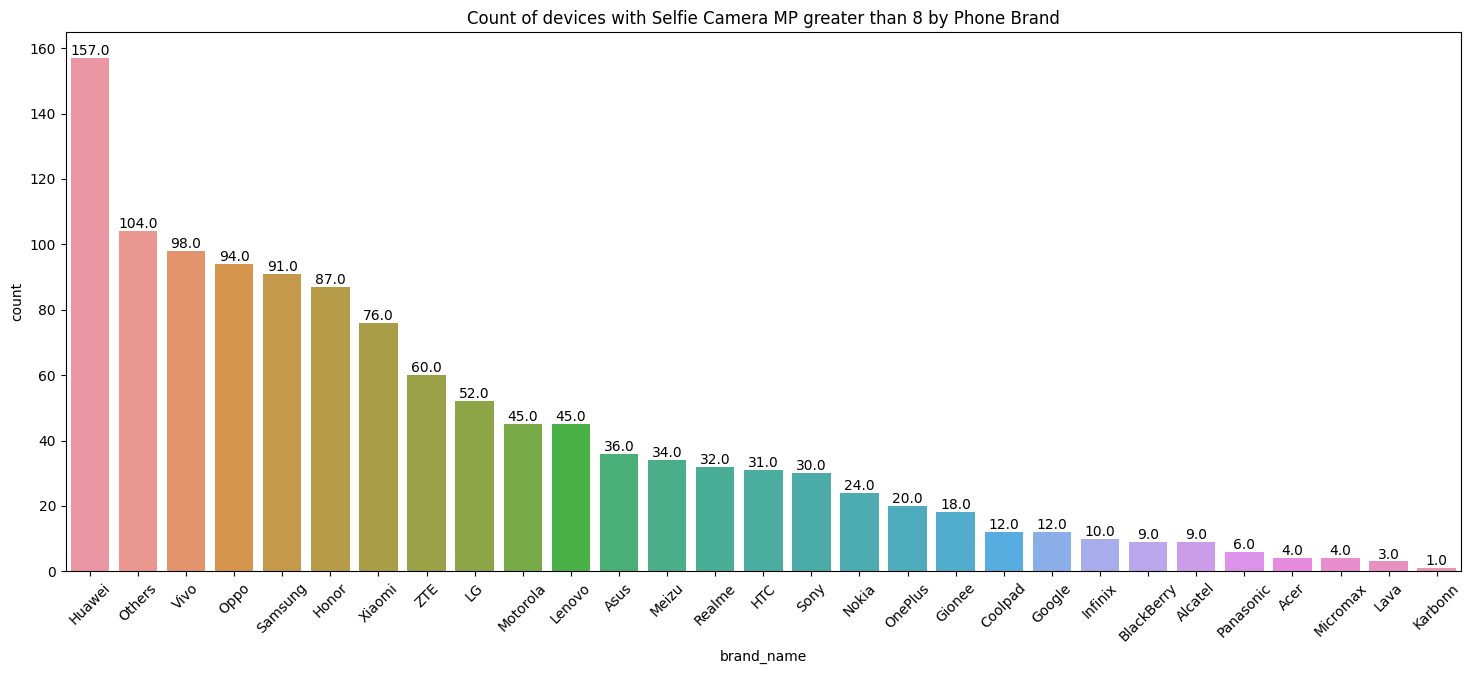

In [ ]:
plt.figure(figsize=(18,7))
# Create a countplot
ax = sns.countplot(data=selfie_8mp, x="brand_name", order = selfie_8mp['brand_name'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Count of devices with Selfie Camera MP greater than 8 by Phone Brand')
plt.xticks(rotation = 45)
plt.show()

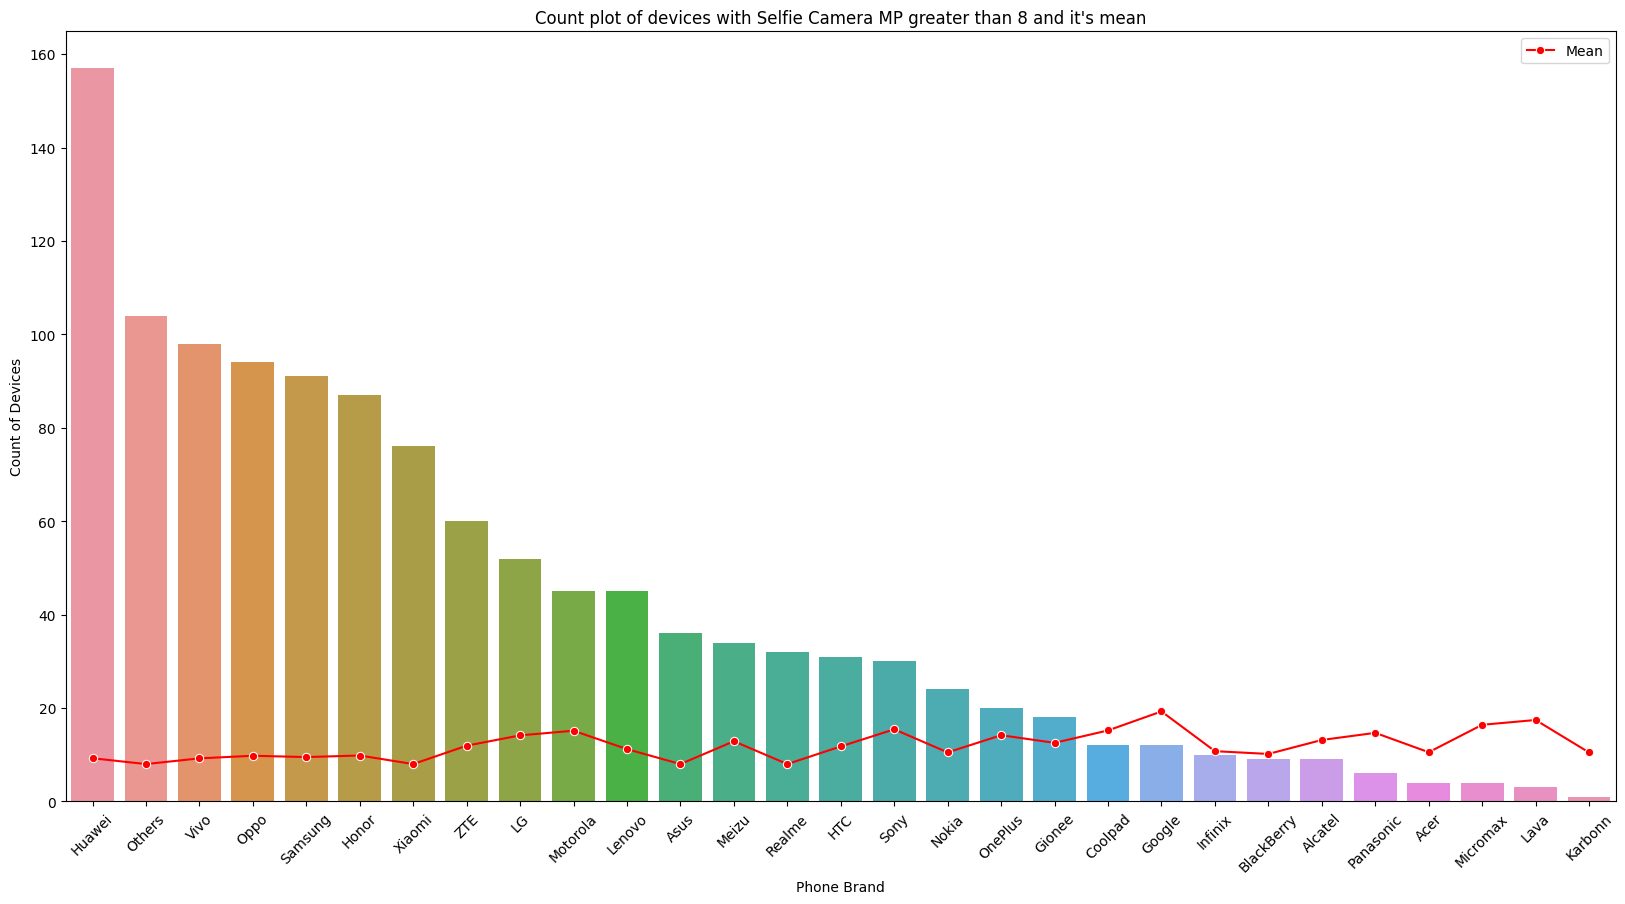

In [ ]:
plt.figure(figsize=(20, 10))

# Calculate the mean value of counts for each category
mean_values = selfie_8mp["selfie_camera_mp"].value_counts().mean()

# Calculate the mean values for each category
mean_values = selfie_8mp.groupby("brand_name")["selfie_camera_mp"].mean()
mean_values = mean_values.reset_index()

# Create a line plot (line graph) showing the mean values
mn = sns.lineplot(data=mean_values, x="brand_name", y="selfie_camera_mp", marker='o', color='red', label="Mean")
plt.xlabel("Day")
plt.ylabel("Mean Selfie Camera MP")

for p in mn.patches:
    mn.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

sns.countplot(data=selfie_8mp, x="brand_name", order = selfie_8mp['brand_name'].value_counts().index)

# Set the labels and title
mn.set(xlabel="Phone Brand", ylabel="Count of Devices")
plt.title("Count plot of devices with Selfie Camera MP greater than 8 and it's mean")
plt.xticks(rotation = 45)
# Show the plot
plt.show();

### New Price differential between phones with 4G, 5G or none

Let's visualize the relationship phones that have 5G or 4G or none.

In [ ]:
new_price_5g = pd.DataFrame(df.groupby("5g")['normalized_new_price'].mean()).reset_index()
print(new_price_5g)

    5g  normalized_new_price
0   no              5.186217
1  yes              6.251745


In [ ]:
new_price_4g = df.groupby("4g")['normalized_new_price'].mean().to_frame().reset_index()
print(new_price_4g)

    4g  normalized_new_price
0   no              4.766611
1  yes              5.456666


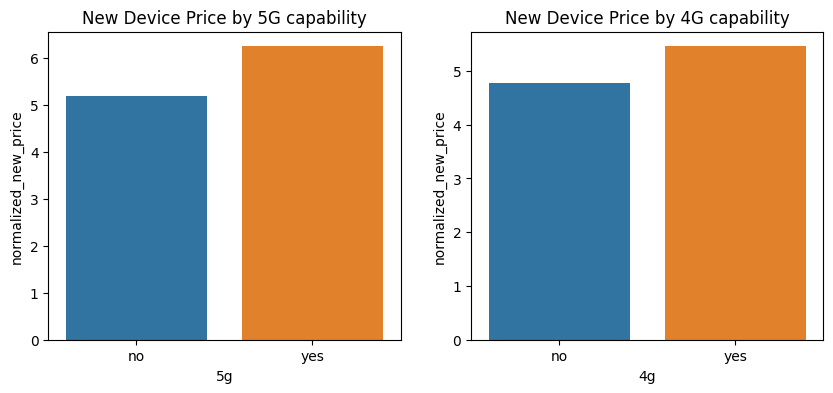

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Create barplots for the first dataframe on the left subplot
sns.barplot(x = '5g',y='normalized_new_price', data=new_price_5g, ax=axes[0], )
axes[0].set_title('New Device Price by 5G capability')

# Create barplots for the second dataframe on the right subplot
sns.barplot(x = '4g',y='normalized_new_price', data=new_price_4g, ax=axes[1])
axes[1].set_title('New Device Price by 4G capability');

### Screensize change over the years

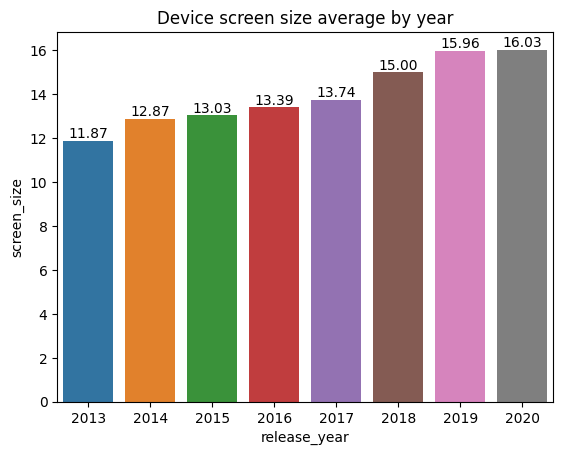

In [ ]:
release_year_screen_size = pd.DataFrame(df.groupby("release_year")['screen_size'].mean()).reset_index()

plt.title("Device screen size average by year")
ax = sns.barplot(data = release_year_screen_size, x = 'release_year', y = "screen_size")
1
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

It seems that newer phones tend to have a larger screensize.

### Used Price vs Days used

<Axes: xlabel='days_used', ylabel='normalized_used_price'>

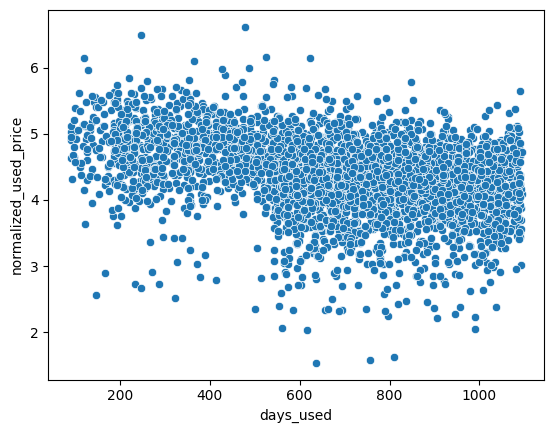

In [ ]:
sns.scatterplot(data = df, x = 'days_used', y = 'normalized_used_price')

## Data Preprocessing

### Missing Value Treatement

Let's review how our data is structured and see if there are any significant missing values:

In [ ]:
df1 = df_original.copy()
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Recall from the correlogram that there's a strong relationship of phones that have a high `selfie_camera_mp` tend to also have a high `main_camera_mp`. Thus, we can use it as a grouping estimator to fill in those missing values.

Let's fix the missing values in the data.

- For the variable `main_camera_mp`, we will impute the missing values with the median grouped by `brand_name` and `selfie_camera_mp`.

- For the remaining variables (`selfie_main_camera`, `int_memory`, `ram`, `battery`, and `weight`), we will compute their median value

In [ ]:
missing_columns = ["selfie_camera_mp","int_memory","ram","battery","weight"]

for i in missing_columns:
    median_value = df1[i].median()
    df1[i].fillna(median_value, inplace=True)

df1.isnull().sum()


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#let's look at some of the observations with no value for main camera mp
missing_main_camera = df1[df1["main_camera_mp"].isnull()]
missing_main_camera.head(10)

brand_name       os  screen_size   4g   5g  main_camera_mp  \
59     Infinix  Android        17.32  yes   no             NaN   
60     Infinix  Android        15.39  yes   no             NaN   
61     Infinix  Android        15.39  yes   no             NaN   
62     Infinix  Android        15.39  yes   no             NaN   
63     Infinix  Android        15.29  yes   no             NaN   
64        Lava  Android        14.50  yes   no             NaN   
97       Meizu  Android        15.39  yes  yes             NaN   
98       Meizu  Android        15.37  yes   no             NaN   
99       Meizu  Android        15.37  yes   no             NaN   
100      Meizu  Android        15.29  yes   no             NaN   

     selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.0        32.0  2.0   6000.0   209.0          2020   
60                8.0        64.0  4.0   5000.0   185.0          2020   
61                8.0        32.0  2.0   5000.0   185.0          2020   
62               16.0        32.0  3.0   4000.0   178.0          2019   
63               16.0        32.0  2.0   4000.0   165.0          2019   
64                5.0        32.0  2.0   3200.0   150.0          2020   
97               20.0       128.0  8.0   4500.0   199.0          2020   
98               16.0       128.0  6.0   4500.0   183.0          2019   
99                8.0        32.0  2.0   4000.0   184.0          2019   
100              20.0       128.0  6.0   3600.0   166.0          2019   

     days_used  normalized_used_price  normalized_new_price  
59         245               4.282068              4.597642  
60         173               4.363608              4.711780  
61         256               4.181439              4.505460  
62         316               4.555244              4.602166  
63         468               4.416670              4.871297  
64         356               3.989910              4.381026  
97         186               5.167867              6.272028  
98         449               4.665512              5.526329  
99         190               4.290185              5.195177  
100        459               4.721085              5.830679

In [ ]:
missing_percentage = df1.groupby(['selfie_camera_mp','brand_name'])['main_camera_mp'].apply(lambda x: (x.isna().sum() / len(x)) * 100)
missing_percentage.sort_values(ascending = False).head(30)

selfie_camera_mp  brand_name
13.0              Realme        100.000000
8.0               Infinix       100.000000
16.0              Panasonic     100.000000
24.0              Asus          100.000000
16.0              Infinix       100.000000
                  Coolpad       100.000000
                  BlackBerry    100.000000
12.0              ZTE           100.000000
16.0              OnePlus        94.444444
                  Realme         92.307692
5.0               Realme         88.888889
8.0               Realme         85.714286
32.0              Oppo           72.727273
16.0              Motorola       72.727273
25.0              Realme         66.666667
16.0              Xiaomi         66.666667
                  Meizu          57.142857
20.0              Meizu          56.250000
13.0              Coolpad        50.000000
8.0               Sony           43.750000
32.0              Vivo           36.363636
20.0              ZTE            33.333333
8.0               BlackBe

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name", "selfie_camera_mp"])["main_camera_mp"].transform("median")
)

In [ ]:
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           19
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

The remainder of the missing values, I will just compute the median to fill these.

In [ ]:
df1['main_camera_mp'].fillna(df1['main_camera_mp'].median(), inplace=True)

In [ ]:
df1.isnull().sum() #let's check once again to make sure we have imputted our missing data


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### EDA

It is a good idea to explore the data once again after manipulating it. We'll have a brief overview of our imputed data to validate it didn't change much.

In [ ]:
def two_histograms(feature):
  # Create a figure with two subplots side by side
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  # Plot the first histogram on the left subplot
  sns.histplot(data=df, x=feature, ax=axes[0], kde=True)
  axes[0].set_title("Original Dataset")

  # Plot the second histogram on the right subplot
  sns.histplot(data=df1, x=feature, ax=axes[1], kde=True)
  axes[1].set_title("Imputed Dataset")

  # Adjust layout
  plt.tight_layout()

  # Show the plot
  plt.show()


#### Main Camera MP

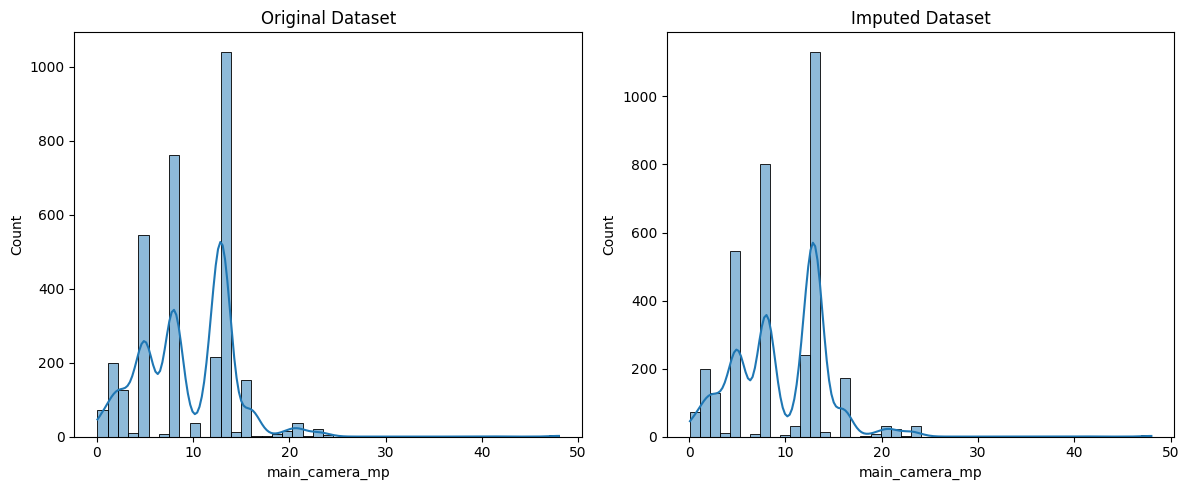

In [ ]:
two_histograms("main_camera_mp")

#### Selfie Camera MP

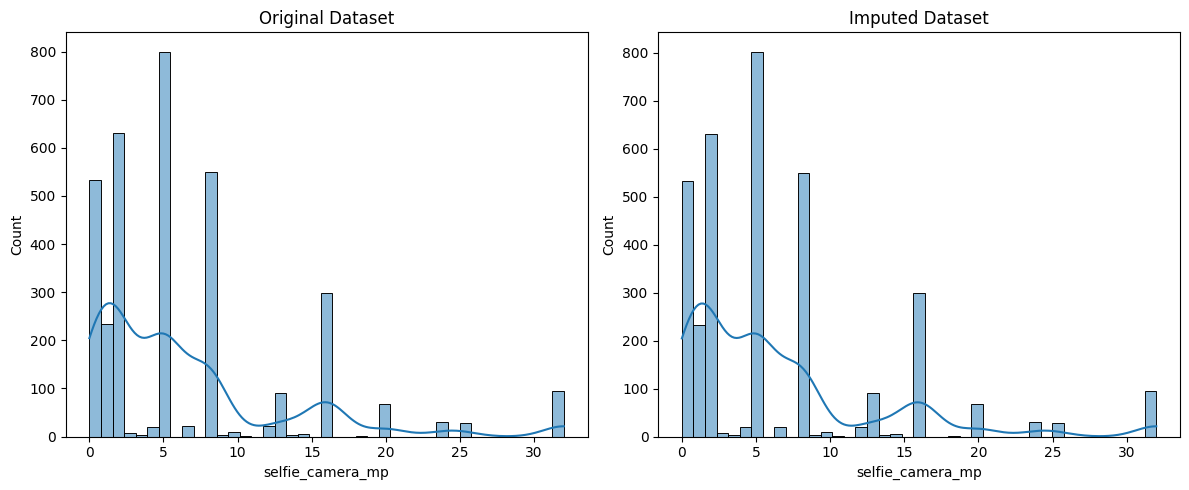

In [ ]:
two_histograms("selfie_camera_mp")

#### Internal Memory

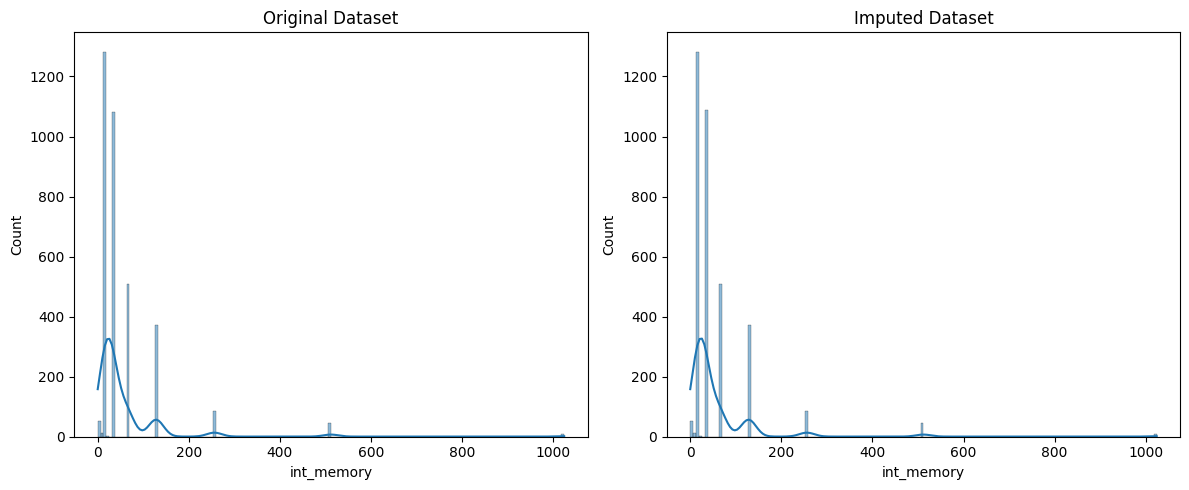

In [ ]:
two_histograms("int_memory")

####RAM

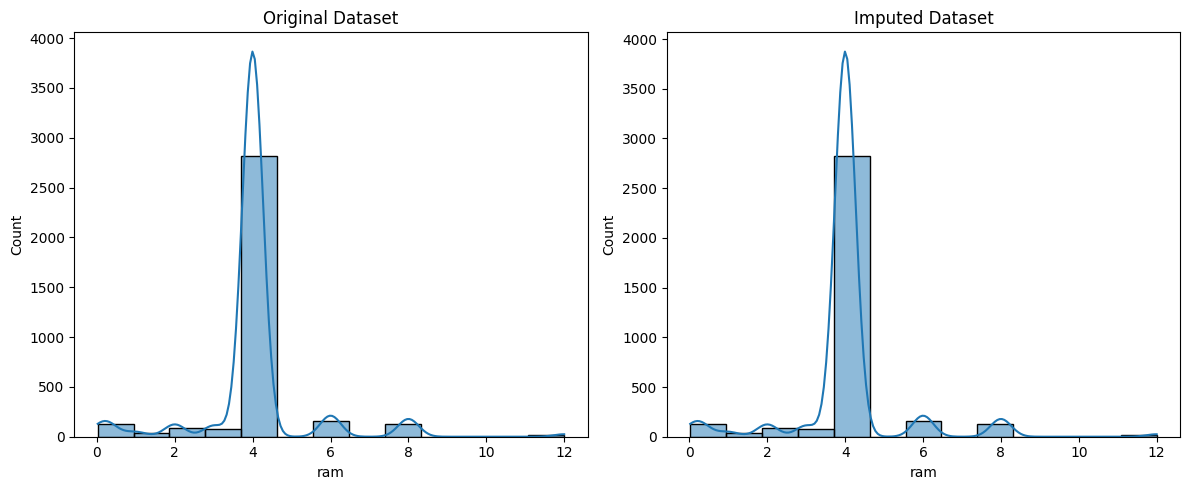

In [ ]:
two_histograms("ram")

The data is practically identical with the imputation. I wanted to see particularly for the main camera MP feature, whether this held true. It appears to be the case. So I'll proceed to develop my model.

### Outlier Detection

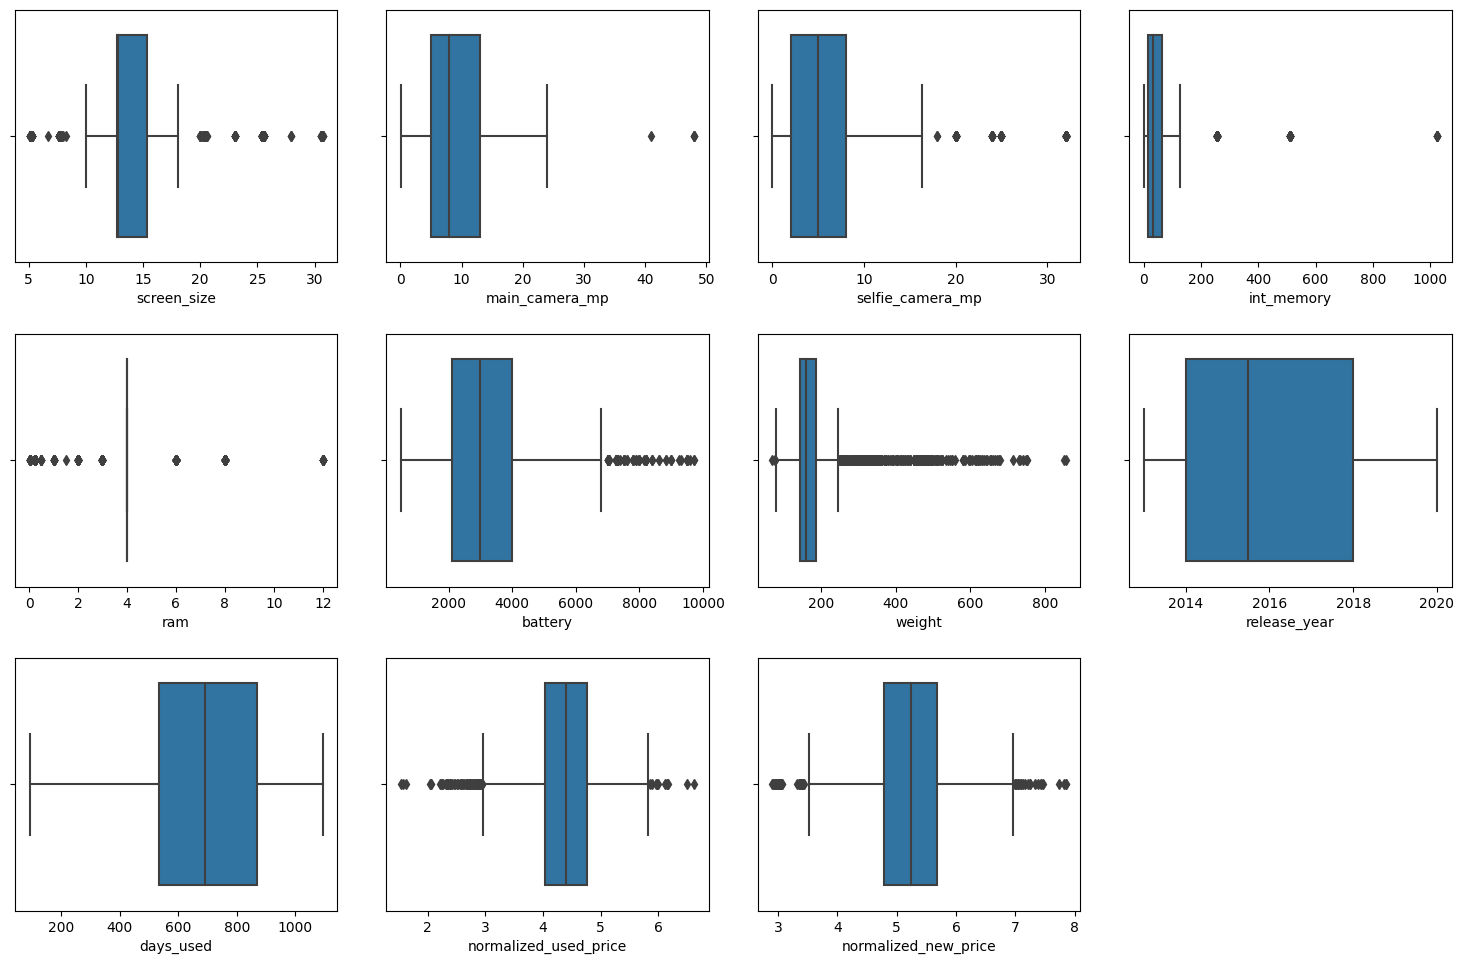

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show();

- There are quite a few outliers in the data, particularly for `battery` and `weight`
- However, we will not treat them as they are proper values


Notice that the normalized used price and new price has a significant amount of outliers. I'll create a function to be able to see how many outliers we have.

In [ ]:
def view_outliers(data):
  # Calculate quartiles and IQR
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1

  # Determine outliers using IQR method
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[(data < lower_bound) | (data > upper_bound)]

  # Group the data based on whether they are outliers or not
  grouped = data.apply(lambda x: 'Outlier' if x in outliers.values else 'Not Outlier').value_counts()

  print("Grouped data by outliers:")
  return(grouped)


In [ ]:
used_price_outliers = view_outliers(df1['normalized_used_price'])
used_price_outliers

Grouped data by outliers:


Not Outlier    3369
Outlier          85
Name: normalized_used_price, dtype: int64

In [ ]:
#we can see that we have 85 observations that are outliers. Let's see what this number represents
used_price_outliers/used_price_outliers.sum()

Not Outlier    0.975391
Outlier        0.024609
Name: normalized_used_price, dtype: float64

We can see that this represents about ~2.5% of our data. However, the price can vary by the brand of the phone, so let's see if there are any significant outliers by brand.

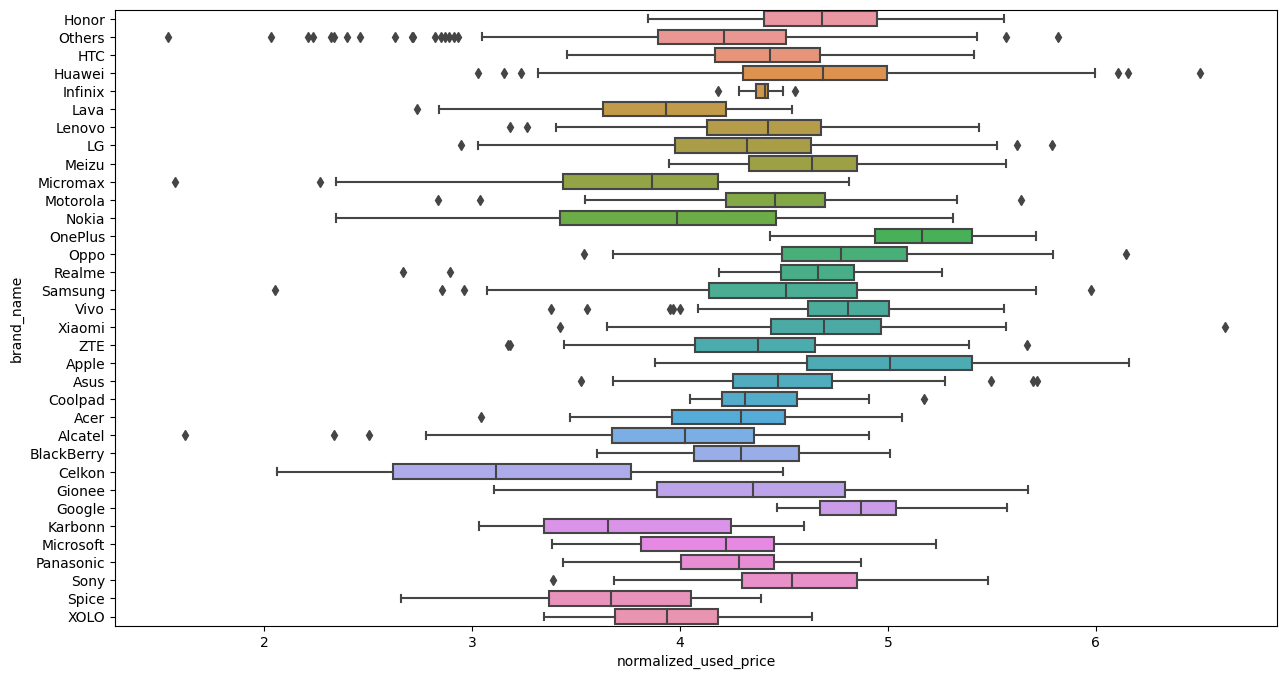

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df1, x = 'normalized_used_price', y='brand_name')
plt.show()

I notice that there are a few outliers in the data, so we can proceed to remove them grouped by `brand_name`

In [ ]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

df1 = df1[~df1.groupby('brand_name')['normalized_used_price'].apply(is_outlier)]

<ipython-input-872-5d9406822b06>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1 = df1[~df1.groupby('brand_name')['normalized_used_price'].apply(is_outlier)]


In [ ]:
df1.shape

(3433, 15)

### Data Prepration for Modeling

- We want to predict the price of a used phone
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
df1.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

I will not be dropping any features for now, as they all appear to offer valuable information.

In [ ]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
#print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

#### Creating Dummies

We have a few features that we will create dummies for (`brand_name`, `os`, `4g`, and `5g`)

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
dummies = X.select_dtypes(include=["object", "category"]).columns.tolist()
print(dummies)


['brand_name', 'os', '4g', '5g']


In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  release_year  days_used  ...  brand_name_Spice  \
0   3020.0   146.0          2020        127  ...                 0   
1   4300.0   213.0          2020        325  ...                 0   
2   4200.0   213.0          2020        162  ...                 0   
3   7250.0   480.0          2020        345  ...                 0   
4   5000.0   185.0          2020        293  ...                 0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0                0                0                  0               0   
1                0                0                  0               0   
2                0                0                  0               0   
3                0                0                  0               0   
4                0                0                  0               0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0          0           0       0       1       0  
1          0           0       0       1       1  
2          0           0       0       1       1  
3          0           0       0       1       1  
4          0           0       0       1       0  

[5 rows x 49 columns]

## Model Building - Linear Regression

In [ ]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Fitting the Linear Model

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.848
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     272.9
Date:                   Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                           19:16:43   Log-Likelihood:                 196.62
No. Observations:                   2403   AIC:                            -295.2
Df Residuals:                       2354   BIC:                            -11.81
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.845**, which is good.

2. Our Adjusted R-squared and R-squared are relatively close **(0.846 vs 0.842)**, which can indicate that our number of features doesn't significantly affect model performance.

3. The coefficients tell us how one unit change in X can affect y. The sign of the coefficient indicates if the relationship is positive or negative.


## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### (1) No multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#define a function to check for vif

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]


    return vif.sort_values(by='VIF', ascending=False)

In [ ]:
checking_vif(x_train)

feature           VIF
0                   const  3.779361e+06
12       brand_name_Apple  3.360967e+01
46                 os_iOS  3.253975e+01
34      brand_name_Others  9.191839e+00
1             screen_size  6.986731e+00
37     brand_name_Samsung  6.933865e+00
21      brand_name_Huawei  5.839074e+00
7                  weight  5.300510e+00
8            release_year  4.904051e+00
24          brand_name_LG  4.583534e+00
26      brand_name_Lenovo  4.276246e+00
33        brand_name_Oppo  3.885742e+00
6                 battery  3.821972e+00
42      brand_name_Xiaomi  3.670532e+00
43         brand_name_ZTE  3.663289e+00
31       brand_name_Nokia  3.484835e+00
40        brand_name_Vivo  3.330433e+00
13        brand_name_Asus  3.262353e+00
11     brand_name_Alcatel  3.258404e+00
30    brand_name_Motorola  3.239192e+00
10   normalized_new_price  3.143145e+00
20       brand_name_Honor  3.140658e+00
28    brand_name_Micromax  3.046414e+00
19         brand_name_HTC  2.967037e+00
3        selfie_camera_mp  2.855539e+00
38        brand_name_Sony  2.709600e+00
9               days_used  2.586569e+00
47                 4g_yes  2.488429e+00
2          main_camera_mp  2.295713e+00
5                     ram  2.282729e+00
27       brand_name_Meizu  2.128636e+00
35   brand_name_Panasonic  2.029848e+00
17      brand_name_Gionee  1.953058e+00
41        brand_name_XOLO  1.938992e+00
29   brand_name_Microsoft  1.930695e+00
36      brand_name_Realme  1.907892e+00
48                 5g_yes  1.853928e+00
44              os_Others  1.792855e+00
45             os_Windows  1.739173e+00
25        brand_name_Lava  1.683762e+00
39       brand_name_Spice  1.650000e+00
15      brand_name_Celkon  1.619214e+00
23     brand_name_Karbonn  1.599363e+00
14  brand_name_BlackBerry  1.595673e+00
32     brand_name_OnePlus  1.516151e+00
16     brand_name_Coolpad  1.464268e+00
18      brand_name_Google  1.327147e+00
22     brand_name_Infinix  1.305475e+00
4              int_memory  1.303224e+00

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_names = checking_vif(x_train).loc[checking_vif(x_train)['VIF'] > 5,"feature"].tolist()
print(col_names)


['const', 'brand_name_Apple', 'os_iOS', 'brand_name_Others', 'screen_size', 'brand_name_Samsung', 'brand_name_Huawei', 'weight']


In [ ]:
#we'll drop the constant, as we don't want to remove this column given its nature
col_names.remove("const")
print(col_names)

['brand_name_Apple', 'os_iOS', 'brand_name_Others', 'screen_size', 'brand_name_Samsung', 'brand_name_Huawei', 'weight']


In [ ]:
#in addition, brand_name and os are categorical features, so we'll remove those as well when running our VIF analysis
col_names = [item for item in col_names if not (item.startswith('brand') or item.startswith('os'))]
print(col_names)

['screen_size', 'weight']


In [ ]:
res = treating_multicollinearity(x_train, y_train, col_names)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0       weight                           0.841408                 0.227549
1  screen_size                           0.840314                 0.228333

Our coefficient whose removal has the least impact to our Adjusted R-squared is `weight`. So we'll proceed with removing this coefficient and rerun our linear regression model.

In [ ]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping: ", col_to_drop)
vif

VIF after dropping:  weight


feature           VIF
0                   const  3.708710e+06
11       brand_name_Apple  3.358949e+01
45                 os_iOS  3.248397e+01
33      brand_name_Others  9.165750e+00
36     brand_name_Samsung  6.931779e+00
20      brand_name_Huawei  5.838822e+00
7            release_year  4.809870e+00
23          brand_name_LG  4.582735e+00
25      brand_name_Lenovo  4.275368e+00
32        brand_name_Oppo  3.885733e+00
41      brand_name_Xiaomi  3.670496e+00
42         brand_name_ZTE  3.662626e+00
6                 battery  3.607547e+00
30       brand_name_Nokia  3.482197e+00
1             screen_size  3.416793e+00
39        brand_name_Vivo  3.328698e+00
12        brand_name_Asus  3.261839e+00
10     brand_name_Alcatel  3.258106e+00
29    brand_name_Motorola  3.237161e+00
9    normalized_new_price  3.139106e+00
19       brand_name_Honor  3.138277e+00
27    brand_name_Micromax  3.046168e+00
18         brand_name_HTC  2.966345e+00
3        selfie_camera_mp  2.825295e+00
37        brand_name_Sony  2.703708e+00
8               days_used  2.570449e+00
46                 4g_yes  2.474960e+00
5                     ram  2.280123e+00
2          main_camera_mp  2.223601e+00
26       brand_name_Meizu  2.128636e+00
34   brand_name_Panasonic  2.029553e+00
16      brand_name_Gionee  1.952938e+00
40        brand_name_XOLO  1.938797e+00
28   brand_name_Microsoft  1.930112e+00
35      brand_name_Realme  1.907892e+00
47                 5g_yes  1.852783e+00
44             os_Windows  1.738829e+00
43              os_Others  1.692775e+00
24        brand_name_Lava  1.682864e+00
38       brand_name_Spice  1.649803e+00
14      brand_name_Celkon  1.618433e+00
22     brand_name_Karbonn  1.599106e+00
13  brand_name_BlackBerry  1.595440e+00
31     brand_name_OnePlus  1.516040e+00
15     brand_name_Coolpad  1.464129e+00
17      brand_name_Google  1.326709e+00
21     brand_name_Infinix  1.303945e+00
4              int_memory  1.303163e+00

* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     272.1
Date:                   Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                           19:16:47   Log-Likelihood:                 171.91
No. Observations:                   2403   AIC:                            -247.8
Df Residuals:                       2355   BIC:                             29.83
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


##### Dealing with high p-values

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'days_used', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_LG', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3, ).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.2
Date:                   Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                           19:16:48   Log-Likelihood:                 161.76
No. Observations:                   2403   AIC:                            -295.5
Df Residuals:                       2389   BIC:                            -214.5
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



RMSE      MAE  R-squared  Adj. R-squared     MAPE
0  0.226219  0.17886   0.843192        0.842273  4.22491

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.231179  0.181579   0.834597        0.832315  4.304554

#### (2) Test for Linearity and Independence

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable. The independence of the error terms (or residuals) is important.

If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
690        3.658162       3.642602   0.015561
3385       4.789407       4.554384   0.235023
2329       4.247066       4.607709  -0.360643
1581       4.436278       4.519579  -0.083301
1181       4.100327       4.247669  -0.147342

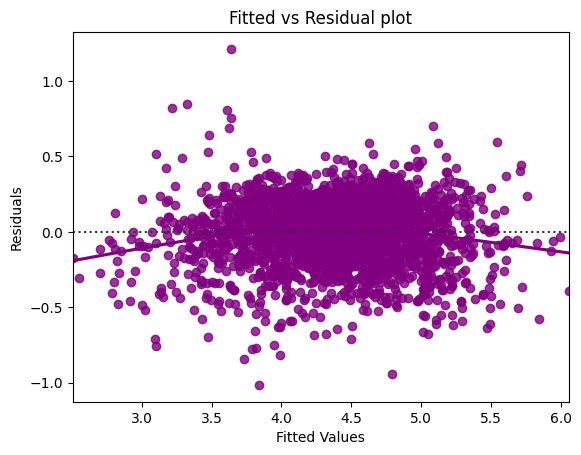

In [ ]:
# let's plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

#### (3) Test for Normality

For our third test, we'll test whether the residuals of our model on our test data set are normally distributed. Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

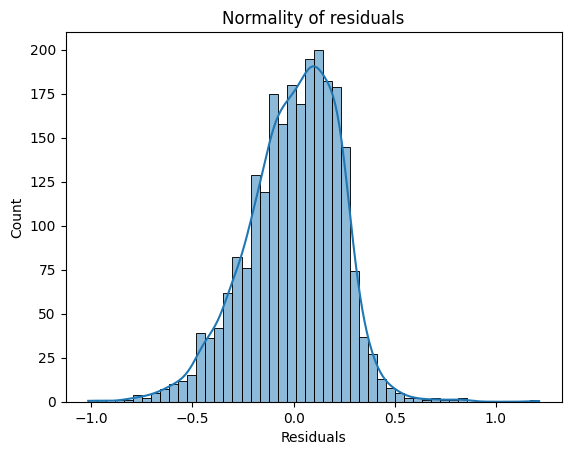

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

Let's look at the QQ Plot to see if this is the case

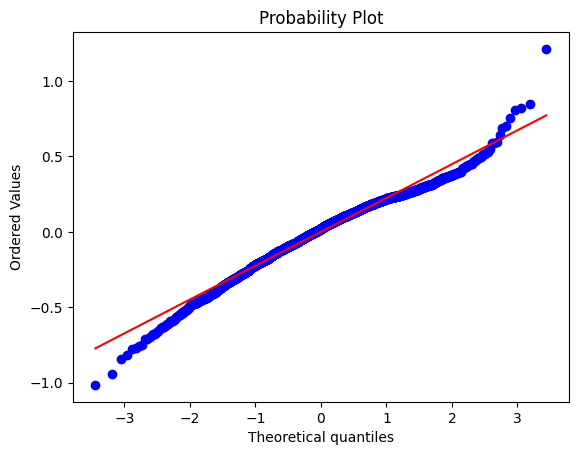

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
#running a test to see if the residuals are normally distributed
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9824506640434265, pvalue=1.2003266837849248e-16)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

#### (4) Test for Homoscedasticity

The last assumption we are going to test is if the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic. The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.






In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.9744401845309245), ('p-value', 0.6722064549012288)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
996   5.820706   5.573178
1242  4.025352   3.905474
2598  4.387263   4.401310
2422  4.955334   4.778463
2020  3.965185   3.706191
1385  4.161380   4.303550
1908  3.958334   4.073539
1828  4.568610   4.396719
1740  4.322144   4.056856
1884  3.875359   4.102958

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.2
Date:                   Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                           19:16:49   Log-Likelihood:                 161.76
No. Observations:                   2403   AIC:                            -295.5
Df Residuals:                       2389   BIC:                            -214.5
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE      MAE  R-squared  Adj. R-squared     MAPE
0  0.226219  0.17886   0.843192        0.842273  4.22491

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.231179  0.181579   0.834597        0.832315  4.304554

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.3% of the used car prices

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

-   Overall, the model is able to explain ~84% of the variation of the Used Nomralized price of a device within 4.3% of the used normalized price.

-   The biggest driver in the price of a used device is the price of that new device. If the price of the device increases by one unit, then its used price is increased by 0.4151 units, all other variables held constant

-   Likewise, we can see that if the device is released in 2020, the used normalized price is expected to increase by 0.1419 units.

- Having 5G actually a delimiting factor and the presence of having 4G on a used device is expected to drive the price of the used device by 0.0462 units.

- All in all, we see that the price of a phone is driven by the brand name and release year. This makes sense as it goes in line with the expectation that people look at these factors across the board when looking for a used phone.

- However, strictly speaking, the greater the features the phone has (screen size, ram, main camera and selfie camera megapixel count), the greater the expected normalized used price it should have.

- As the company is looking to better understand how to price their used devices, the company could have a good estimate of what the used price should be based on this parameters.

- Nevertheless, the company could look to gather more data and insights such as the condition the used phone is in and have a bigger representation of brands that reflect the whole market.

- With the data in hand, I'd recommend focusing on the release year, brand name, new normalized price, and phone features to have a good idea of how to price your used devices.

- It's imperative to understand that the model reflect the current data and would need to be reanalyzed when having that information in place.

___